# COURSEWORK 1 - NETWORK ANALYSIS

In this coursework, you will have to analyse networks based on what you have learned so far in class. Many exercises will require you to discuss the results of your analysis, some other will leave you the choice of which algorithm to use for a particular task. This is by design because this coursework assesses whether you understand network science and whether you can apply it to real-world networks. For this reason, if you realise you need to make assumptions to answer a question, do so and always, always motivate your assumptions and answers!

## PART 1 - The Game of Networks

### Exercise 1.1 [10 marks]

#### 1.1.1 
For each round of the game, compute the following network statistics:
- Number of nodes
- Number of links
- Density
- Clustering coefficient
- Average degrees (in-degree, out-degree, total degree)
- Average path length
- Diameter
- Size of the giant component
- Degree distributions (in-degree, out-degree, total degree)
- Centrality distribution (choose one centrality measure, motivating your choice)

#### 1.1.2
Display these results using a pandas dataframe in which rows are the rounds and columns are the quantities.

#### 1.1.3
In light of these results, provide a brief description of the network (one paragraph maximum).

#### 1.1.4 
What type of network (e.g., random, small world, etc.) do you think this is? Motivate your answer by using your results.

In [3]:
#1.1.1For each round of the game, compute the following network statistics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import networkx as nx

In [4]:
#Average path length
def average_path_length(G):
    path_length = 0
    for node in G.nodes():
        #用单源最短路径算法求出节点V到图G每个节点的最短路径
        spl = nx.single_source_shortest_path_length(G,node)
        for p in spl.values():
            path_length =  path_length+p
    path_length =  path_length/(G.number_of_nodes()*(G.number_of_nodes()-1))
    return path_length
# nx.average_shortest_path_length(G1)

In [5]:
#Diameter
# nx.diameter(G1)
def diameter(G):
    max_length = 0
    for node in G.nodes():
        spl = nx.single_source_shortest_path_length(G,node)
        for p in spl.values():
            if max_length < p:
                max_length = p
    return max_length

In [1]:
#degree Distribution
#use the K = <K^2>/<k>^2 to represent the degree distribution
def k_total_degree_distribution(G):
    k1=0
    k2=0
    N = len(G.degree())
    node_degree = list(G.degree())
    for degree in node_degree:
        k1 += degree[1]*degree[1]
        k2 += degree[1]
    return float(((k1/N)/(((k2)/N))**2))

def k_in_degree_distribution(G):
    k1=0
    k2=0
    N = len(G.in_degree())
    node_degree = list(G.in_degree())
    for degree in node_degree:
        k1 += degree[1]*degree[1]
        k2 += degree[1]
    return float(((k1/N)/(((k2)/N))**2))

def k_out_degree_distribution(G):
    k1=0
    k2=0
    N = len(G.out_degree())
    node_degree = list(G.out_degree())
    for degree in node_degree:
        k1 += degree[1]*degree[1]
        k2 += degree[1]
    return float(((k1/N)/(((k2)/N))**2))

In [6]:
#round1
exposuredf=pd.read_csv('D:\\DBBA\\coursework1\\round1_edgelist.csv')
G1 = nx.from_pandas_edgelist(exposuredf, create_using=nx.DiGraph())
G1_result = {}
G1_result['Number of nodes'] = G1.number_of_nodes()
G1_result['Number of links'] = G1.number_of_edges()
G1_result['Density'] = nx.density(G1)
G1_result['Clustering coefficient'] = nx.average_clustering(G1)
G1_result['Average degrees(in-degree)'] = np.mean(list(dict(G1.in_degree()).values()))
G1_result['Average degrees(out-degree)'] =  np.mean(list(dict(G1.out_degree()).values()))
G1_result['Average degrees(total degree)'] = np.mean(list(dict(nx.degree(G1)).values()))
G1_result['Average path length'] = average_path_length(G1)
G1_result['Diameter'] = diameter(G1)
G1_result['Size of the giant component'] = len(max(nx.strongly_connected_components(G1), key=len))
G1_result['In_degree Distribution(k)'] = k_in_degree_distribution(G1)
G1_result['Out_degree Distribution(k)'] = k_out_degree_distribution(G1)
G1_result['total degree Distribution(k)'] = k_total_degree_distribution(G1)
G1_result['Centrality distribution'] = dict(nx.betweenness_centrality(G1))

In [7]:
#round2
exposuredf=pd.read_csv('D:\\DBBA\\coursework1\\round2_edgelist.csv')
G2 = nx.from_pandas_edgelist(exposuredf, create_using=nx.DiGraph())
G2_result = {}
G2_result['Number of nodes'] = G2.number_of_nodes()
G2_result['Number of links'] = G2.number_of_edges()
G2_result['Density'] = nx.density(G2)
G2_result['Clustering coefficient'] = nx.average_clustering(G2)
G2_result['Average degrees(in-degree)'] = np.mean(list(dict(G2.in_degree()).values()))
G2_result['Average degrees(out-degree)'] = np.mean(list(dict(G2.out_degree()).values()))
G2_result['Average degrees(total degree)'] = np.mean(list(dict(nx.degree(G2)).values()))
G2_result['Average path length'] = average_path_length(G2)
G2_result['Diameter'] =diameter(G2)
G2_result['Size of the giant component'] = len(max(nx.strongly_connected_components(G2), key=len))
G2_result['In_degree Distribution(k)'] = k_in_degree_distribution(G2)
G2_result['Out_degree Distribution(k)'] = k_out_degree_distribution(G2)
G2_result['total degree Distribution(k)'] = k_total_degree_distribution(G2)
G2_result['Centrality distribution'] = dict(nx.betweenness_centrality(G2))

In [8]:
#round3
exposuredf=pd.read_csv('D:\\DBBA\\coursework1\\round3_edgelist.csv')
G3 = nx.from_pandas_edgelist(exposuredf, create_using=nx.DiGraph())
G3_result = {}
G3_result['Number of nodes'] = G3.number_of_nodes()
G3_result['Number of links'] = G3.number_of_edges()
G3_result['Density'] = nx.density(G3)
G3_result['Clustering coefficient'] = nx.average_clustering(G3)
G3_result['Average degrees(in-degree)'] = np.mean(list(dict(G3.in_degree()).values()))
G3_result['Average degrees(out-degree)'] = np.mean(list(dict(G3.out_degree()).values()))
G3_result['Average degrees(total degree)'] = np.mean(list(dict(nx.degree(G3)).values()))
G3_result['Average path length'] = average_path_length(G3)
G3_result['Diameter'] =diameter(G3)
G3_result['Size of the giant component'] = len(max(nx.strongly_connected_components(G3), key=len))
G3_result['In_degree Distribution(k)'] = k_in_degree_distribution(G3)
G3_result['Out_degree Distribution(k)'] = k_out_degree_distribution(G3)
G3_result['total degree Distribution(k)'] = k_total_degree_distribution(G3)
G3_result['Centrality distribution'] = dict(nx.betweenness_centrality(G3))

Betweenness centrality represents the degree of interaction between a node and other nodes in the network. In the game network, if a student node has higher intermediate centrality, it means that this studentinteracts frequently with other student, knows many students and maybe is loved by other students. So this node is an important node in the network. That's why I use betweenness centrality.

In [98]:
column = ['Number of nodes','Number of links','Density','Clustering coefficient','Average degrees(in-degree)','Average degrees(out-degree)',\
         'Average degrees(total degree)','Average path length','Diameter','Size of the giant component','In_degree Distribution(k)',\
          'Out_degree Distribution(k)','total degree Distribution(k)','Centrality distribution']
row = ['round1','round2','round3']
data = {''}
df = pd.DataFrame(columns=column)
# Degree distributions (in-degree, out-degree, total degree)
# Centrality distribution (choose one centrality measure, motivating your choice)

df = df.append(G1_result,ignore_index=True)
df = df.append(G2_result,ignore_index=True)
df = df.append(G3_result,ignore_index=True)
# df.rename(index = {'0':'round1','1':'round2'},inplace=False)
df.index = ['round1','round2','round3']
# df['new index'] = ['round1','round2','round3']
# df.set_index('new index',inplace = False)
df

,Number of nodes,Number of links,Density,Clustering coefficient,Average degrees(in-degree),Average degrees(out-degree),Average degrees(total degree),Average path length,Diameter,Size of the giant component,In_degree Distribution(k),Out_degree Distribution(k),total degree Distribution(k),Centrality distribution
round1,49,86,0.036565,0.082662,1.755102,1.755102,3.510204,0.765306,11,6,2.279070,1.126284,1.381355,"{'s1814557': 0.026152482269503546, 's1760487':..."
round2,51,125,0.049020,0.163844,2.450980,2.450980,4.901961,1.623137,8,24,2.705856,1.217472,1.527552,"{'s1814557': 0.007346938775510205, 's1760487':..."
round3,51,119,0.046667,0.079884,2.333333,2.333333,4.666667,2.917647,10,33,2.121248,1.321729,1.386555,"{'s1814557': 0.10791205053449951, 's1760487': ..."


#### 1.1.3 
In light of these results, provide a brief description of the network (one paragraph maximum)

From the above table, we can see that from the first round to the second round, the number of nodes, the number of links, density, clustering coefficient, average out degree, average in degree, average degree, average path length and size of giant components in the network increase. but the network diameter decreases. From the second to the third round, there is no change in the number of nodes in the network, but due to the decrease in the number of links, the density, clustering coefficient, average in_degree, average out_degree, and average degree of the network decrease, but the average path length, network diameter, and giant component size increase. I use the heterogeneity parameter kappa to represent the degree distribution. From the first round to the second round, in_degree kappa, out_degree kappa, and total degree kappa increase as the number of network nodes and connections increases. From the second to the third round, in_degree kappa and total degree kappa decrease  due to the decrease of the number of links,but out_degree kappa increases.


#### 1.1.4
What type of network (e.g., random, small world, etc.) do you think this is? Motivate your answer by using your results.

I think this network is random network. If it is a random network,the degree distribution has the properties of a Poisson distribution, i.e. the heterogeneity kappa value is close to 1. The kappa of in_degree distribution,out_degree distribution and total degree distribution is close to one. So I think the degree distribution is the Poisson distribution. If it is a scale-free network, then the degree distribution satisfies a power-law distribution, and then the heterogeneity kappa value is much greater than 1. Obviously the network does not satisfy either of these. The average path length of this network is small. If the network is the samll world network, the clustering coefficient is very high. Obviously the network does not satisfy the property. So I think the network is the random network

### Exercise 1.2 [10 marks]
Plot the temporal evolution of the quantities you computed for Exercise 1.1 and discuss their evolution. Specifically, discuss whether the way these quantities evolved is something you expected, and why.

Note: make sure every plot is clear and it is easy to undertsand which quantity is being plotted! When discussing the results, be accurate in specifying which quantity/plot you are referring to.

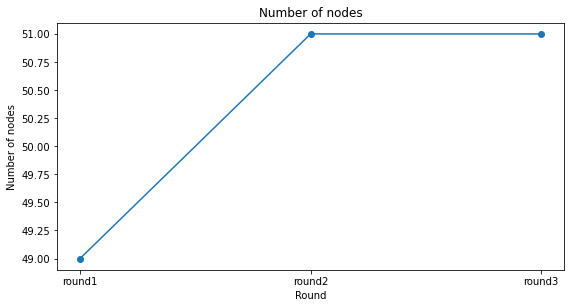

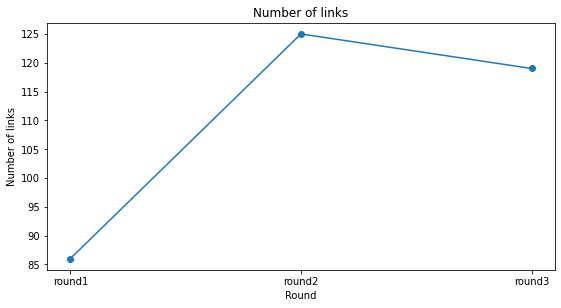

In [32]:
#Number of nodes
plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
x=list(df['Number of nodes'])
y=['round1','round2','round3']
plt.xlabel("Round")
plt.ylabel("Number of nodes")
plt.title('Number of nodes')
plt.scatter(y,x)
plt.plot(y,x)
plt.show()

#number of links
plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
x=list(df['Number of links'])
y=['round1','round2','round3']
plt.xlabel("Round")
plt.ylabel("Number of links")
plt.title('Number of links')
plt.scatter(y,x)
plt.plot(y,x)
plt.show()

The number of nodes grows from round1 to round3, which is what I expected. In the first round of the game, some students may not have chosen a connected classmate, so the node represented by that student did not appear in the network. In the second and third rounds, the number of nodes remained the same, representing the total number of students remaining the same.

The number of links increases from the first to the second round, which is what I expect because each node is connected to two new nodes and the number of links increases. However, the number of links decreases from the second to the third round, which is not what I expect. In the third round, each node connects to two more new nodes and the number of connections should increase although some nodes will lose some connections. The decrease in the number of links indicates that some nodes are not connected to new nodes and lose their connections

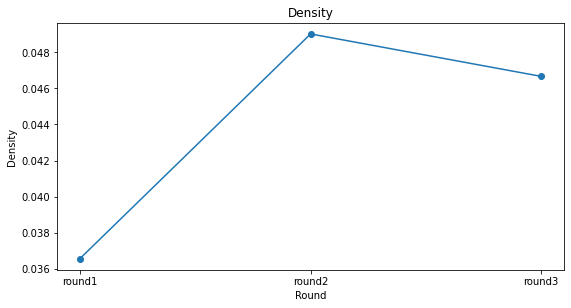

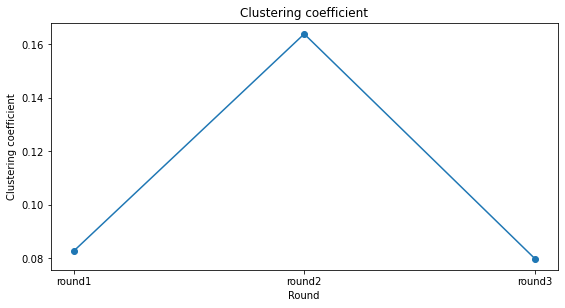

In [33]:
#Density
plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
x=list(df['Density'])
y=['round1','round2','round3']
plt.xlabel("Round")
plt.ylabel("Density")
plt.title('Density')
plt.scatter(y,x)
plt.plot(y,x)
plt.show()

#Clustering coefficient
plt.figure(figsize=(20,10))
plt.subplot(2, 2, 2)
x=list(df['Clustering coefficient'])
y=['round1','round2','round3']
plt.xlabel("Round")
plt.ylabel("Clustering coefficient")
plt.title('Clustering coefficient')
plt.scatter(y,x)
plt.plot(y,x)
plt.show()

#### Density: 
From the first to the second round, the density increases due to the increase in the number of links in the network. From the second to the third round, the density of the network decreases due to the decrease in the number of links. This trend is what I expect.

#### Clustering coefficient: 
From the first to the second round, the number of triangles in the network increases due to the increase in the number of links in the network, and the clustering coefficient increases. From the second to the third round, the number of triangles in the network decreases due to the decrease in the number of links in the network, and the clustering coefficient decreases. This trend is what I expect.

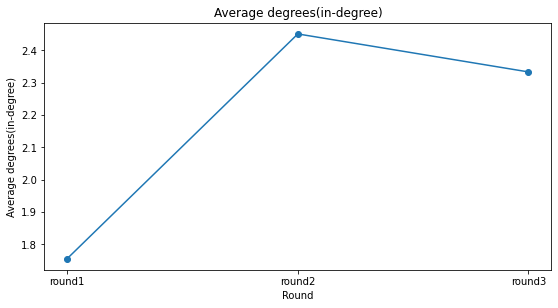

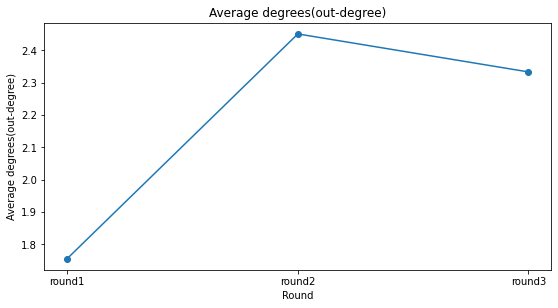

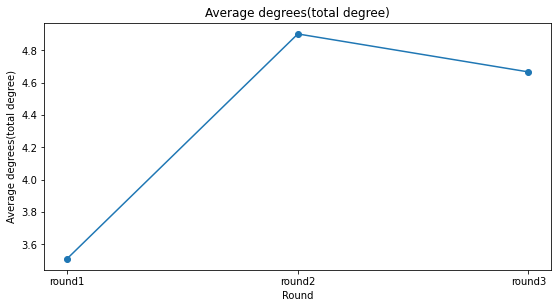

In [34]:
#Average degrees(in-degree)
plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
x=list(df['Average degrees(in-degree)'])
y=['round1','round2','round3']
plt.xlabel("Round")
plt.ylabel("Average degrees(in-degree)")
plt.title('Average degrees(in-degree)')
plt.scatter(y,x)
plt.plot(y,x)
plt.show()

plt.figure(figsize=(20,10))
plt.subplot(2, 2, 2)
#Average degrees(out-degree)
x=list(df['Average degrees(out-degree)'])
y=['round1','round2','round3']
plt.xlabel("Round")
plt.ylabel("Average degrees(out-degree)")
plt.title('Average degrees(out-degree)')
plt.scatter(y,x)
plt.plot(y,x)
plt.show()

plt.figure(figsize=(20,10))
plt.subplot(2, 2, 3)
#Average degrees(total degree)
x=list(df['Average degrees(total degree)'])
y=['round1','round2','round3']
plt.xlabel("Round")
plt.ylabel("Average degrees(total degree)")
plt.title('Average degrees(total degree)')
plt.scatter(y,x)
plt.plot(y,x)
plt.show()

#### Average degrees(in_degree, out_degree, total degree): 
All three quantities align with the trend of the number of links in the network. This is what I expect.

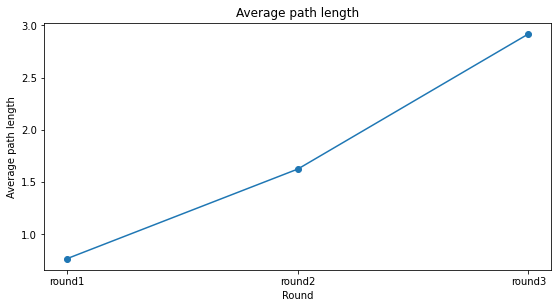

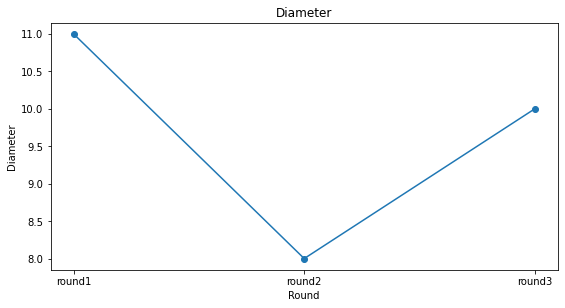

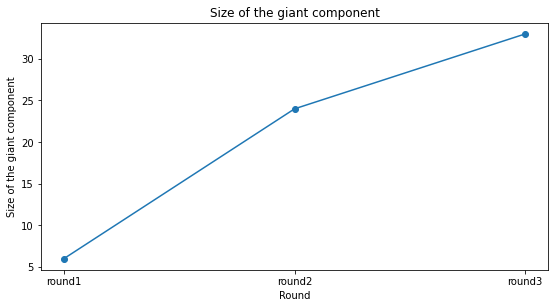

In [37]:
plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
#Average path length
x=list(df['Average path length'])
y=['round1','round2','round3']
plt.xlabel("Round")
plt.ylabel("Average path length")
plt.title('Average path length')
plt.scatter(y,x)
plt.plot(y,x)
plt.show()

plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
#Diameter
x=list(df['Diameter'])
y=['round1','round2','round3']
plt.xlabel("Round")
plt.ylabel("Diameter")
plt.title('Diameter')
plt.scatter(y,x)
plt.plot(y,x)
plt.show()

plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
#Size of the giant component
x=list(df['Size of the giant component'])
y=['round1','round2','round3']
plt.xlabel("Round")
plt.ylabel("Size of the giant component")
plt.title('Size of the giant component')
plt.scatter(y,x)
plt.plot(y,x)
plt.show()

#### Average path length:
The average path length increases from the first round to the second round, which is not what I expected. As the number of nodes in the network increases, the shortest path between any two nodes should decrease and the average path length should decrease. And it is possible that the average path length increases because two unconnected nodes are connected in this round, increasing the average path. From the second round to the third round the average path length increases, which is what I expect. Due to the decrease in the number of connections, it is possible that the shortest path length between two nodes in the network increases and therefore the average path length increases.

#### Diameter: 
The diameter of the network decreases from the first round to the second round, which is not what I expect. In a directed network, it is possible that the longest path of any two nodes in the network can pass through other new nodes due to the increase in the number of connections, and the diameter should increase. The diameter increases from the second round to the third round, which is also not what I expect. The number of links in the network decreases because there are fewer nodes passed through and the longest path of any two nodes may decrease.

#### Size of giant component: 
From the first round to the second round, the size of the giant component increases because the number of links increases and the number of nodes which are connected to each other increases. From the second to the third round, the size of the giant component increases, which does not meet my expectation. The number of connections decreases, the number of any two connected nodes also decreases, and the size of the giant component decreases. Maybe it is because there are new connections generated, which increases the number of connected nodes and causes the size of the giant component to increase.

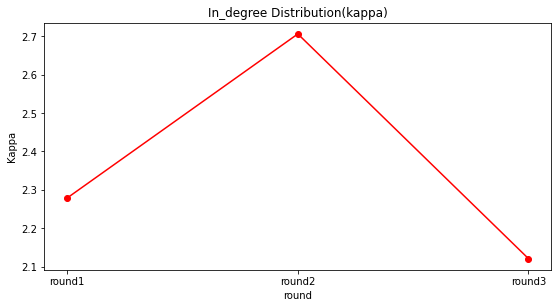

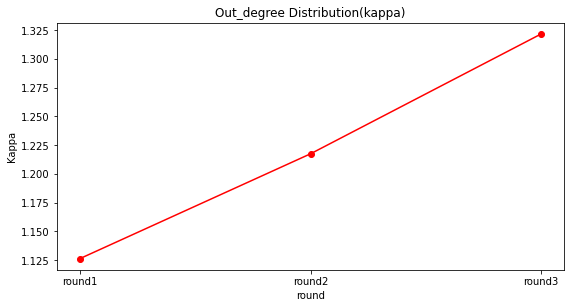

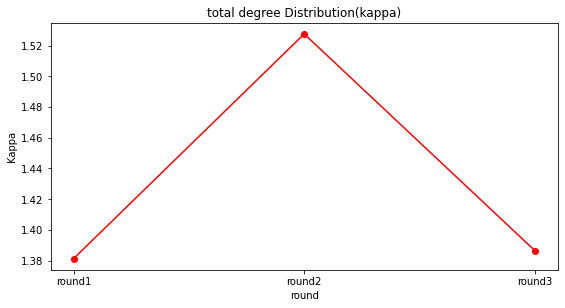

In [30]:
#in_degree distribution
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
plt.xlabel("round")
plt.ylabel("Kappa")
plt.title('In_degree Distribution(kappa)')
y=['round1','round2','round3']
plt.scatter(y,df['In_degree Distribution(k)'],color = 'red')
plt.plot(y,df['In_degree Distribution(k)'],color = 'red')
plt.show()

#out_degree Distribution
plt.figure(figsize=(20,10))
plt.subplot(2, 2, 2)
plt.xlabel("round")
plt.ylabel("Kappa")
plt.title('Out_degree Distribution(kappa)')
y=['round1','round2','round3']
plt.scatter(y,df['Out_degree Distribution(k)'],color = 'red')
plt.plot(y,df['Out_degree Distribution(k)'],color = 'red')
plt.show()

plt.figure(figsize=(20,10))
plt.subplot(2, 2, 3)
plt.xlabel("round")
plt.ylabel("Kappa")
plt.title('total degree Distribution(kappa)')
y=['round1','round2','round3']
plt.scatter(y,df['total degree Distribution(k)'],color = 'red')
plt.plot(y,df['total degree Distribution(k)'],color = 'red')
plt.show()

In_degree distribution and total_degree distribution show the same variation, and this variation is in line with my expectation. From the first to the second round the average in_degree, out_degree and total degree increase, and the kappa increases. From the second to the third round, the average in_degree, out_degree and total degree decrease, and the kappa decreases as well. But the out_degree distribution does not change as I expected, it keeps increasing from the first to the third round, and I think it should be the same as the other two: increasing and then decreasing as the average out_degree decreases from round1 to round3.

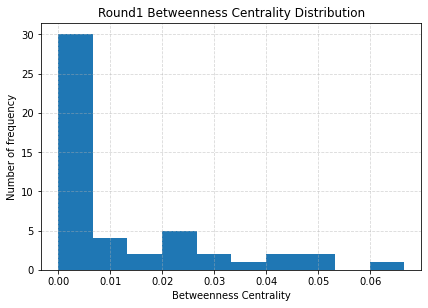

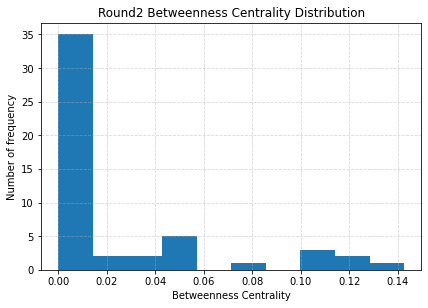

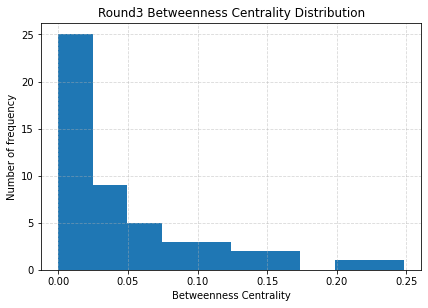

In [103]:
#Betweeness Centrality Distribution
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.hist(list(df.at['round1','Centrality distribution'].values()),bins=10)
# plt.xticks(range(0,1,10))
plt.xlabel("Betweenness Centrality")
plt.ylabel("Number of frequency")
plt.title('Round1 Betweenness Centrality Distribution')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

plt.figure(figsize=(15,10))
plt.subplot(2,2,2)
plt.hist(list(df.at['round2','Centrality distribution'].values()),bins=10)
# plt.xticks(range(0,1,10))
plt.xlabel("Betweenness Centrality")
plt.ylabel("Number of frequency")
plt.title('Round2 Betweenness Centrality Distribution')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

plt.figure(figsize=(15,10))
plt.subplot(2,2,3)
plt.hist(list(df.at['round3','Centrality distribution'].values()),bins=10)
# plt.xticks(range(0,1,10))
plt.xlabel("Betweenness Centrality")
plt.ylabel("Number of frequency")
plt.title('Round3 Betweenness Centrality Distribution')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In the first round of the game, the betweenness centrality of many nodes is relatively low, and the maximum betweenness centrality of the node is only about 0.06. In the second round of the game, the betweenness centrality of many nodes increases, and the maximum betweenness centrality is about 0.14, which is what I expect. In the second round of the game, each node must be connected to two new nodes. The degree of interaction between nodes and other nodes increases, and the values of betweenness centrality increases. In the third round of the game, the maximum value of betweenness centrality increases, and the values of betweenness centrality of many nodes increases, which is in line with my expectations. In the third round of the game, each node needs to connect two new nodes again, and the interaction between the nodes and other nodes increases again. In these three rounds of games, only a few nodes have high betweenness centrality, and large numbers of the nodes have low betweenness centrality, which is in line with my expectations. Only a few nodes in the network have high degrees, and many nodes have low degrees.

### Exercise 1.3 [10 marks] 

#### 1.3.1
Compute 2-node and 3-node motifs for each round (I suggest you use the library <a href="https://github.com/stoufferlab/pymfinder/">pymfinder</a>, if you decide to use a different one makes sure it works properly). Compute their significance profile. Report your results in a dataframe.

#### 1.3.2
Only for motifs you think are significant, discuss their meaning and on why you think you observe them in the network.

#### 1.3.3
Plot the temporal evolution of motifs that you think are significant.

In [20]:
import pymfinder as py
result1 = py.pymfinder('D:\\DBBA\\coursework1\\round1_.txt',motifsize=2, nrandomizations = 50,randomize = False, allmotifs = True) 
result2 = py.pymfinder('D:\\DBBA\\coursework1\\round2.txt',motifsize=2, nrandomizations = 50,randomize = False, allmotifs = True) 
result3 = py.pymfinder('D:\\DBBA\\coursework1\\round3.txt',motifsize=2, nrandomizations = 50,randomize = False, allmotifs = True)
result4 = py.pymfinder('D:\\DBBA\\coursework1\\round1_.txt',motifsize=3, nrandomizations = 50,randomize = False, allmotifs = True)
result5 = py.pymfinder('D:\\DBBA\\coursework1\\round2.txt',motifsize=3, nrandomizations = 50,randomize = False, allmotifs = True)
result6 = py.pymfinder('D:\\DBBA\\coursework1\\round3.txt',motifsize=3, nrandomizations = 50,randomize = False, allmotifs = True)

In [106]:
column = ['motif2_1','motif2_2','motif3_1','motif3_2','motif3_3','motif3_4','motif3_5','motif3_6','motif3_7','motif3_8','motif3_9','motif3_10','motif3_11','motif3_12','motif3_13']
df = pd.DataFrame(columns=column)
df['motif2_1'] = [list(result1.motifs.values())[0].real_z,list(result2.motifs.values())[0].real_z,list(result3.motifs.values())[0].real_z]
df['motif2_2'] = [list(result1.motifs.values())[1].real_z,list(result2.motifs.values())[1].real_z,list(result3.motifs.values())[1].real_z]
df['motif3_1'] = [list(result4.motifs.values())[0].real_z,list(result5.motifs.values())[0].real_z,list(result6.motifs.values())[0].real_z]
df['motif3_2'] = [list(result4.motifs.values())[1].real_z,list(result5.motifs.values())[1].real_z,list(result6.motifs.values())[1].real_z]
df['motif3_3'] = [list(result4.motifs.values())[2].real_z,list(result5.motifs.values())[2].real_z,list(result6.motifs.values())[2].real_z]
df['motif3_4'] = [list(result4.motifs.values())[3].real_z,list(result5.motifs.values())[3].real_z,list(result6.motifs.values())[3].real_z]
df['motif3_5'] = [list(result4.motifs.values())[4].real_z,list(result5.motifs.values())[4].real_z,list(result6.motifs.values())[4].real_z]
df['motif3_6'] = [list(result4.motifs.values())[5].real_z,list(result5.motifs.values())[5].real_z,list(result6.motifs.values())[5].real_z]
df['motif3_7'] = [list(result4.motifs.values())[6].real_z,list(result5.motifs.values())[6].real_z,list(result6.motifs.values())[6].real_z]
df['motif3_8'] = [list(result4.motifs.values())[7].real_z,list(result5.motifs.values())[7].real_z,list(result6.motifs.values())[7].real_z]
df['motif3_9'] = [list(result4.motifs.values())[8].real_z,list(result5.motifs.values())[8].real_z,list(result6.motifs.values())[8].real_z]
df['motif3_10'] = [list(result4.motifs.values())[9].real_z,list(result5.motifs.values())[9].real_z,list(result6.motifs.values())[9].real_z]
df['motif3_11'] = [list(result4.motifs.values())[10].real_z,list(result5.motifs.values())[10].real_z,list(result6.motifs.values())[10].real_z]
df['motif3_12'] = [list(result4.motifs.values())[11].real_z,list(result5.motifs.values())[11].real_z,list(result6.motifs.values())[11].real_z]
df['motif3_13'] = [list(result4.motifs.values())[12].real_z,list(result5.motifs.values())[12].real_z,'nan']
df.index = ['round1','round2','round3']
df

,motif2_1,motif2_2,motif3_1,motif3_2,motif3_3,motif3_4,motif3_5,motif3_6,motif3_7,motif3_8,motif3_9,motif3_10,motif3_11,motif3_12,motif3_13
round1,-5.522254,5.522254,-3.095777,-3.707723,-2.093891,-4.061011,3.481421,6.929646,0.786019,0.399418,2.265282,-0.545207,-0.516659,-0.379280,-0.202073
round2,-6.992396,6.992396,-3.716442,-4.003118,-2.644190,-2.815813,2.334789,1.690998,-3.637084,-1.272483,3.156549,1.366084,3.173434,1.805202,-0.202073
round3,-4.335632,4.335632,-2.194176,-1.369388,-4.636308,-3.800479,2.321275,5.467649,1.298745,0.748331,-0.012944,-1.220243,-0.613941,-0.748331,nan


motif2_1 means the motifsize = 2, motif ID=1, the values are zscore values

#### 1.3.2
I think type 2 of 2-node motif is significant. The two nodes represents two students. There is a bidirectional edge between two nodes, which means that the two students know each other very well. They are friends. In the game network, some students chose nodes to connect randomly. If there is a directed edge between two students nodes, we don’t know whether the two students know each other. If there is a bidirectional edge between two nodes, There is a high probability that the two students know each other well. So I think the type 2 of 2-node motif is significant.

I also think the type 8 of 3-node motif is significant. The motif represents that a student have two friends, but the two friends do not know each other, so there is no link between the two friend nodes. I think the motif is significant because the student who have two friends loves to make friends with others. Maybe the students have many friends in the networks but the friends do not know each other. So the student is the social butterfly in the network. Maybe the student node is the central node in the network, which have a huge impact in the network. So I think type 8 of 3-node motif is significant.

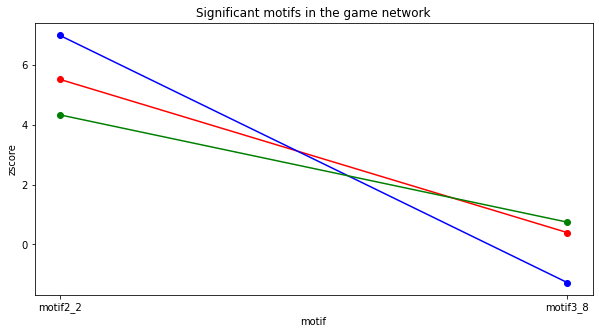

In [108]:
plt.figure(figsize=(10,5))
plt.xlabel("motif")
plt.ylabel("zscore")
plt.title('Significant motifs in the game network')
y=['motif2_2','motif3_8']
plt.scatter(y,[df.at['round1','motif2_2'],df.at['round1','motif3_8']],color = 'red')
plt.scatter(y,[df.at['round2','motif2_2'],df.at['round2','motif3_8']],color = 'blue')
plt.scatter(y,[df.at['round3','motif2_2'],df.at['round3','motif3_8']],color = 'green')
plt.plot(y,[df.at['round1','motif2_2'],df.at['round1','motif3_8']],color = 'red',label = 'round1')
plt.plot(y,[df.at['round2','motif2_2'],df.at['round2','motif3_8']],color = 'blue',label = 'round2')
plt.plot(y,[df.at['round3','motif2_2'],df.at['round3','motif3_8']],color = 'green',label = 'round3')
plt.show()

### Exercise 1.4 [10 marks]

#### 1.4.1
Use an algorithm of your choice (motivate your choice by discussing the pros and cons) to find the communities in the network from the last round. Draw the partitioned network and print the node memberships.

#### 1.4.2
Discuss your findings from 1.4.1, including any limitation of these results.

#### 1.4.1
I used the “modularity maximization” to calculate the communities in the last round network. The pros of the algorithm are fast and accurate. So I can find the communities in a shorter time. The con of the algorithm is that it will merge smaller communities into large ones. I pay more attention to the time, so I choose the method.

In [12]:
from networkx.algorithms.community import greedy_modularity_communities
result = greedy_modularity_communities(G3)
result

[frozenset({'s2023179',
            's2041603',
            's2045912',
            's2154913',
            's2160591',
            's2168270',
            's2168730',
            's2169141',
            's2177703',
            's2196839',
            's2198227',
            's2228706',
            's2251666'}),
 frozenset({'s1810787',
            's2122036',
            's2175454',
            's2176251',
            's2178448',
            's2185398',
            's2186708',
            's2229058',
            's2234598',
            's2254083',
            's2254361',
            's2259528'}),
 frozenset({'s1984025',
            's2140075',
            's2163972',
            's2181306',
            's2184535',
            's2187031',
            's2207545',
            's2237514',
            's2251114',
            's2259096',
            's2259358',
            's2260713'}),
 frozenset({'s1753186',
            's1760487',
            's1814557',
            's2182294',
          

In [9]:
def create_partition_map(partition):
    partition_map = {}
    for idx, cluster_nodes in enumerate(partition):
        for node in cluster_nodes:
            partition_map[node] = idx
    return partition_map

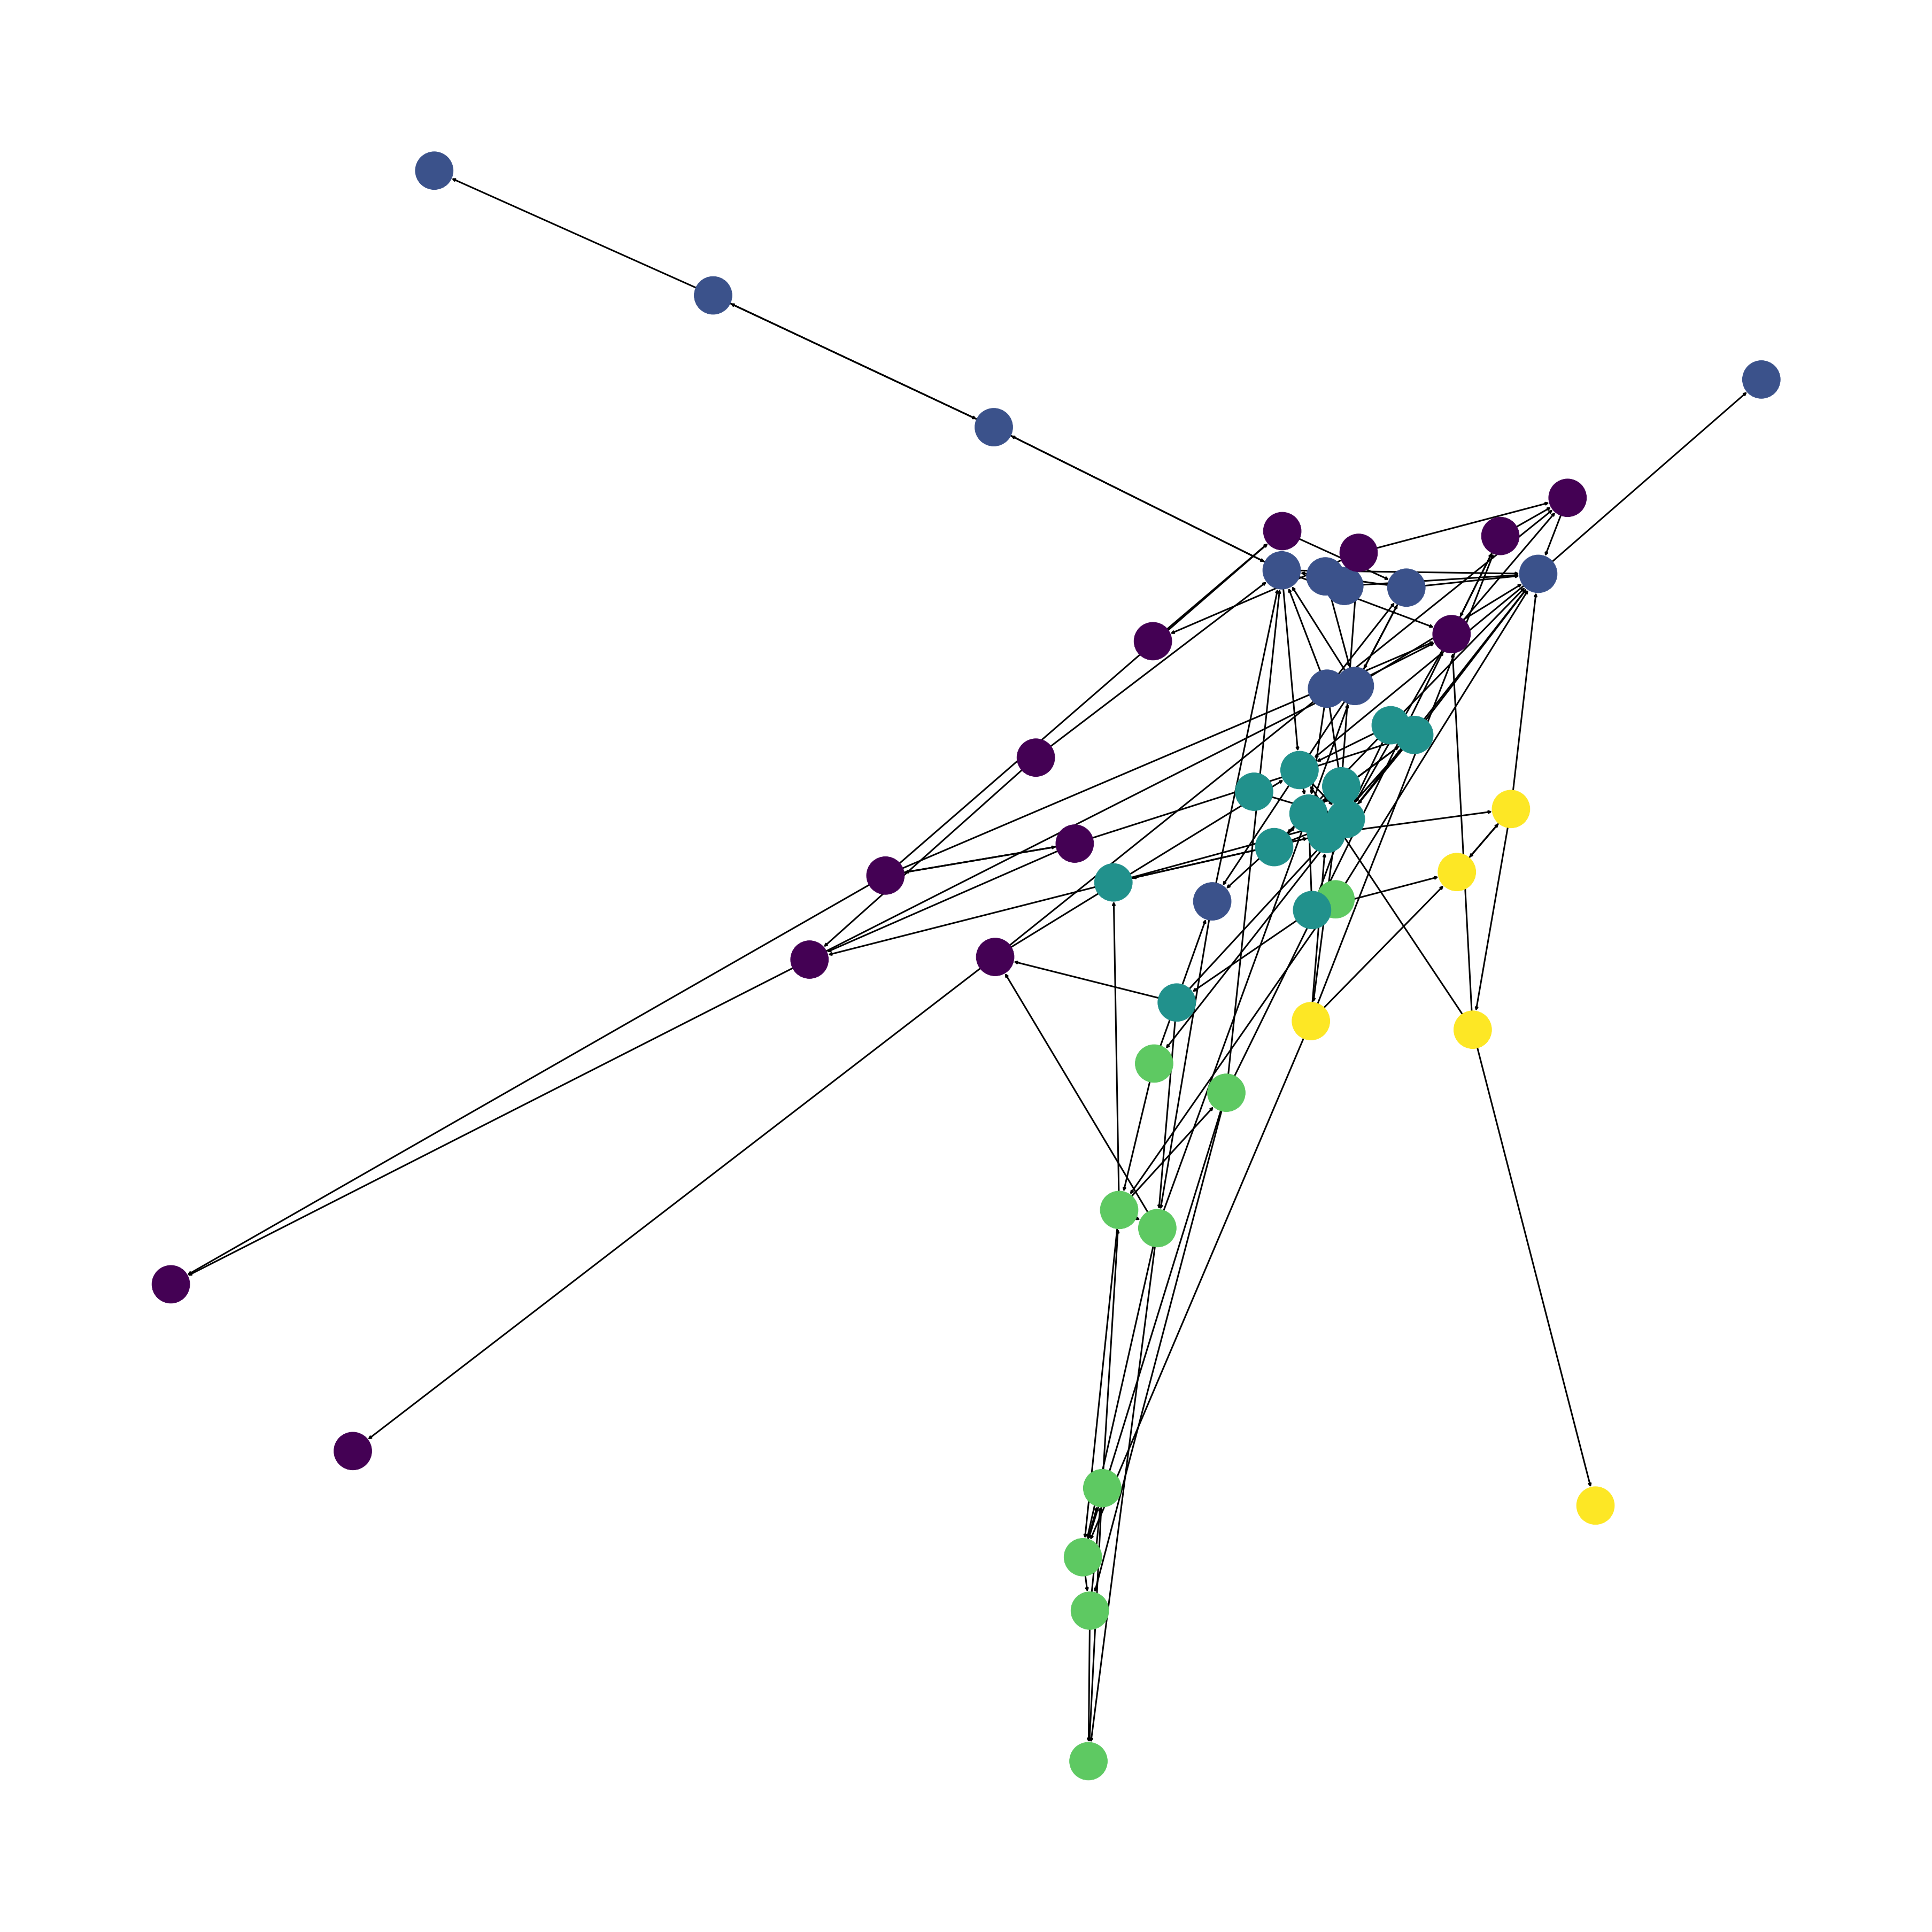

In [13]:
import matplotlib.pyplot as plt
partition_map = create_partition_map(result)

node_colors = [partition_map[n] for n in G3.nodes()]
plt.figure(figsize=(50,50))
nx.draw(G3,with_labels=False, node_color=node_colors,width=3,node_size=5000)
# nx.draw(G2,cmpa=plt.get_cmap('jet'),node_color=node_colors,node_size=30,with_labels=True)
# nx.draw(G2,pos = nx.circular_layout(G2),node_color=node_colors,node_size=300,with_labels = True)

#### 1.4.2
There are 5 communities in the last round network. The first four communities are about the same size. However, in the last community, there are only 5 nodes. The community is quite small, compared to other communities. Each node represents a student. Students in the same community have some similarities and it is easier for them to make friends with each other than with other students in a different community. 
I think the limitation of the results is that maybe some small communities may be merged into larger ones by using the algorithm. We cannot actually detect whether there are some smaller communities in the larger ones.


## PART 2 - Bitcoin Networks
For this part, you will use the bitcoin networks available on Learn under "coursework data". These networks represent transactions between users. The direction of the links represents the transaction flow, i.e., a link from i to j represent a transaction from i to j.

Data is provided for the three months between 09-Sep-2013 and 08-Dec-2013, during which there was a price bubble (from 07-Oct to 23-Nov).

### Exercise 2.1 [10 marks]

#### 1.1.1
For each weekly network, find the largest weakly and strongly connected components.

For each of them, compute the following network statistics:
- Number of nodes
- Number of links
- Density
- Clustering coefficient
- Average degrees (in-degree, out-degree, total degree)
- Average path length
- Diameter
- Degree distributions (in-degree, out-degree, total degree)
- Centrality distribution (choose one centrality measure, motivating your choice)


#### 1.1.2
Display these results using a pandas dataframe in which rows are the rounds and columns are the quantities.

#### 1.1.3
In light of these results, provide a brief comparison of the two networks.

#### 1.1.4 
What type of network (e.g., random, small world, etc.) do you think these are? Motivate your answer by using your results.

#### 1.1.1
I choose betweenness centrality to calculate. In Bitcoin network, the centrality of betweenness indicates the influence degree of nodes on network transaction flow, and the nodes with large betweenness may be trading platform accounts or intermediary accounts. Therefore, we can see which accounts are intermediary accounts through intermediary centrality. However, because there are too many nodes in the graph, the intermediate centrality has not been calculated.

In [23]:
GB1 = nx.read_graphml('D:\\DBBA\\coursework1\\bitcoin_data_coursework1\\bitcoin_data_coursework1\\2013-09-09_to_2013-09-15.graphml')
GB2 = nx.read_graphml('D:\\DBBA\\coursework1\\bitcoin_data_coursework1\\bitcoin_data_coursework1\\2013-09-16_to_2013-09-22.graphml')
GB3 = nx.read_graphml('D:\\DBBA\\coursework1\\bitcoin_data_coursework1\\bitcoin_data_coursework1\\2013-09-23_to_2013-09-29.graphml')
GB4 = nx.read_graphml('D:\\DBBA\\coursework1\\bitcoin_data_coursework1\\bitcoin_data_coursework1\\2013-09-30_to_2013-10-06.graphml')
GB5 = nx.read_graphml('D:\\DBBA\\coursework1\\bitcoin_data_coursework1\\bitcoin_data_coursework1\\2013-10-07_to_2013-10-13.graphml')
GB6 = nx.read_graphml('D:\\DBBA\\coursework1\\bitcoin_data_coursework1\\bitcoin_data_coursework1\\2013-10-14_to_2013-10-20.graphml')
GB7 = nx.read_graphml('D:\\DBBA\\coursework1\\bitcoin_data_coursework1\\bitcoin_data_coursework1\\2013-10-21_to_2013-10-27.graphml')
GB8 = nx.read_graphml('D:\\DBBA\\coursework1\\bitcoin_data_coursework1\\bitcoin_data_coursework1\\2013-10-28_to_2013-11-03.graphml')
GB9 = nx.read_graphml('D:\\DBBA\\coursework1\\bitcoin_data_coursework1\\bitcoin_data_coursework1\\2013-11-04_to_2013-11-10.graphml')
GB10 = nx.read_graphml('D:\\DBBA\\coursework1\\bitcoin_data_coursework1\\bitcoin_data_coursework1\\2013-11-11_to_2013-11-17.graphml')
GB11 = nx.read_graphml('D:\\DBBA\\coursework1\\bitcoin_data_coursework1\\bitcoin_data_coursework1\\2013-11-18_to_2013-11-24.graphml')
GB12 = nx.read_graphml('D:\\DBBA\\coursework1\\bitcoin_data_coursework1\\bitcoin_data_coursework1\\2013-11-25_to_2013-12-01.graphml')
GB13 = nx.read_graphml('D:\\DBBA\\coursework1\\bitcoin_data_coursework1\\bitcoin_data_coursework1\\2013-12-02_to_2013-12-08.graphml')

In [40]:
def largest_weakly_component(G):
    Gcc = sorted(nx.weakly_connected_components(G), key=len, reverse=True)
    G_largest_weakly = G.subgraph(Gcc[0])
    return G_largest_weakly

In [41]:
def largest_strongly_component(G):
    Gcc = sorted(nx.strongly_connected_components(G), key=len, reverse=True)
    G_largest_strongly = G.subgraph(Gcc[0])
    return G_largest_strongly

In [42]:
GB1_largest_strongly = largest_strongly_component(GB1)
GB2_largest_strongly = largest_strongly_component(GB2)
GB3_largest_strongly = largest_strongly_component(GB3)
GB4_largest_strongly = largest_strongly_component(GB4)
GB5_largest_strongly = largest_strongly_component(GB5)
GB6_largest_strongly = largest_strongly_component(GB6)
GB7_largest_strongly = largest_strongly_component(GB7)
GB8_largest_strongly = largest_strongly_component(GB8)
GB9_largest_strongly = largest_strongly_component(GB9)
GB10_largest_strongly = largest_strongly_component(GB10)
GB11_largest_strongly = largest_strongly_component(GB11)
GB12_largest_strongly = largest_strongly_component(GB12)
GB13_largest_strongly = largest_strongly_component(GB13)

In [43]:
GB1_largest_weakly = largest_weakly_component(GB1)
GB2_largest_weakly = largest_weakly_component(GB2)
GB3_largest_weakly = largest_weakly_component(GB3)
GB4_largest_weakly = largest_weakly_component(GB4)
GB5_largest_weakly = largest_weakly_component(GB5)
GB6_largest_weakly = largest_weakly_component(GB6)
GB7_largest_weakly = largest_weakly_component(GB7)
GB8_largest_weakly = largest_weakly_component(GB8)
GB9_largest_weakly = largest_weakly_component(GB9)
GB10_largest_weakly = largest_weakly_component(GB10)
GB11_largest_weakly = largest_weakly_component(GB11)
GB12_largest_weakly = largest_weakly_component(GB12)
GB13_largest_weakly = largest_weakly_component(GB13)

In [44]:
#strongly connected component
GB1_largest_strongly_result = {}
GB2_largest_strongly_result = {}
GB3_largest_strongly_result = {}
GB4_largest_strongly_result = {}
GB5_largest_strongly_result = {}
GB6_largest_strongly_result = {}
GB7_largest_strongly_result = {}
GB8_largest_strongly_result = {}
GB9_largest_strongly_result = {}
GB10_largest_strongly_result = {}
GB11_largest_strongly_result = {}
GB12_largest_strongly_result = {}
GB13_largest_strongly_result = {}

In [45]:
GB1_largest_strongly_result['Number of nodes'] = GB1_largest_strongly.number_of_nodes()
GB2_largest_strongly_result['Number of nodes'] = GB2_largest_strongly.number_of_nodes()
GB3_largest_strongly_result['Number of nodes'] = GB3_largest_strongly.number_of_nodes()
GB4_largest_strongly_result['Number of nodes'] = GB4_largest_strongly.number_of_nodes()
GB5_largest_strongly_result['Number of nodes'] = GB5_largest_strongly.number_of_nodes()
GB6_largest_strongly_result['Number of nodes'] = GB6_largest_strongly.number_of_nodes()
GB7_largest_strongly_result['Number of nodes'] = GB7_largest_strongly.number_of_nodes()
GB8_largest_strongly_result['Number of nodes'] = GB8_largest_strongly.number_of_nodes()
GB9_largest_strongly_result['Number of nodes'] = GB9_largest_strongly.number_of_nodes()
GB10_largest_strongly_result['Number of nodes'] = GB10_largest_strongly.number_of_nodes()
GB11_largest_strongly_result['Number of nodes'] = GB11_largest_strongly.number_of_nodes()
GB12_largest_strongly_result['Number of nodes'] = GB12_largest_strongly.number_of_nodes()
GB13_largest_strongly_result['Number of nodes'] = GB13_largest_strongly.number_of_nodes()

In [46]:
GB1_largest_strongly_result['Number of links'] = GB1_largest_strongly.number_of_edges()
GB2_largest_strongly_result['Number of links'] = GB2_largest_strongly.number_of_edges()
GB3_largest_strongly_result['Number of links'] = GB3_largest_strongly.number_of_edges()
GB4_largest_strongly_result['Number of links'] = GB4_largest_strongly.number_of_edges()
GB5_largest_strongly_result['Number of links'] = GB5_largest_strongly.number_of_edges()
GB6_largest_strongly_result['Number of links'] = GB6_largest_strongly.number_of_edges()
GB7_largest_strongly_result['Number of links'] = GB7_largest_strongly.number_of_edges()
GB8_largest_strongly_result['Number of links'] = GB8_largest_strongly.number_of_edges()
GB9_largest_strongly_result['Number of links'] = GB9_largest_strongly.number_of_edges()
GB10_largest_strongly_result['Number of links'] = GB10_largest_strongly.number_of_edges()
GB11_largest_strongly_result['Number of links'] = GB11_largest_strongly.number_of_edges()
GB12_largest_strongly_result['Number of links'] = GB12_largest_strongly.number_of_edges()
GB13_largest_strongly_result['Number of links'] = GB13_largest_strongly.number_of_edges()

In [47]:
GB1_largest_strongly_result['Density'] = nx.density(GB1_largest_strongly)
GB2_largest_strongly_result['Density'] = nx.density(GB2_largest_strongly)
GB3_largest_strongly_result['Density'] = nx.density(GB3_largest_strongly)
GB4_largest_strongly_result['Density'] = nx.density(GB4_largest_strongly)
GB5_largest_strongly_result['Density'] = nx.density(GB5_largest_strongly)
GB6_largest_strongly_result['Density'] = nx.density(GB6_largest_strongly)
GB7_largest_strongly_result['Density'] = nx.density(GB7_largest_strongly)
GB8_largest_strongly_result['Density'] = nx.density(GB8_largest_strongly)
GB9_largest_strongly_result['Density'] = nx.density(GB9_largest_strongly)
GB10_largest_strongly_result['Density'] = nx.density(GB10_largest_strongly)
GB11_largest_strongly_result['Density'] = nx.density(GB11_largest_strongly)
GB12_largest_strongly_result['Density'] = nx.density(GB12_largest_strongly)
GB13_largest_strongly_result['Density'] = nx.density(GB13_largest_strongly)

In [76]:
GB1_largest_strongly_result['Clustering coefficient'] = nx.average_clustering(GB1_largest_strongly)
GB2_largest_strongly_result['Clustering coefficient'] = nx.average_clustering(GB2_largest_strongly)
GB3_largest_strongly_result['Clustering coefficient'] = nx.average_clustering(GB3_largest_strongly)
GB4_largest_strongly_result['Clustering coefficient'] = nx.average_clustering(GB4_largest_strongly)

KeyboardInterrupt: 

In [ ]:
GB4_largest_strongly_result['Clustering coefficient'] = nx.average_clustering(GB4_largest_strongly)
GB5_largest_strongly_result['Clustering coefficient'] = nx.average_clustering(GB5_largest_strongly)
GB6_largest_strongly_result['Clustering coefficient'] = nx.average_clustering(GB6_largest_strongly)
GB7_largest_strongly_result['Clustering coefficient'] = nx.average_clustering(GB7_largest_strongly)
GB8_largest_strongly_result['Clustering coefficient'] = nx.average_clustering(GB8_largest_strongly)
GB9_largest_strongly_result['Clustering coefficient'] = nx.average_clustering(GB9_largest_strongly)
GB10_largest_strongly_result['Clustering coefficient'] = nx.average_clustering(GB10_largest_strongly)
GB11_largest_strongly_result['Clustering coefficient'] = nx.average_clustering(GB11_largest_strongly)
GB12_largest_strongly_result['Clustering coefficient'] = nx.average_clustering(GB12_largest_strongly)
GB13_largest_strongly_result['Clustering coefficient'] = nx.average_clustering(GB13_largest_strongly)

In [48]:
GB1_largest_strongly_result['Average degrees(in-degree)'] = np.mean(list(dict(GB1_largest_strongly.in_degree()).values()))
GB2_largest_strongly_result['Average degrees(in-degree)'] = np.mean(list(dict(GB2_largest_strongly.in_degree()).values()))
GB3_largest_strongly_result['Average degrees(in-degree)'] = np.mean(list(dict(GB3_largest_strongly.in_degree()).values()))
GB4_largest_strongly_result['Average degrees(in-degree)'] = np.mean(list(dict(GB4_largest_strongly.in_degree()).values()))
GB5_largest_strongly_result['Average degrees(in-degree)'] = np.mean(list(dict(GB5_largest_strongly.in_degree()).values()))
GB6_largest_strongly_result['Average degrees(in-degree)'] = np.mean(list(dict(GB6_largest_strongly.in_degree()).values()))
GB7_largest_strongly_result['Average degrees(in-degree)'] = np.mean(list(dict(GB7_largest_strongly.in_degree()).values()))
GB8_largest_strongly_result['Average degrees(in-degree)'] = np.mean(list(dict(GB8_largest_strongly.in_degree()).values()))
GB9_largest_strongly_result['Average degrees(in-degree)'] = np.mean(list(dict(GB9_largest_strongly.in_degree()).values()))
GB10_largest_strongly_result['Average degrees(in-degree)'] = np.mean(list(dict(GB10_largest_strongly.in_degree()).values()))
GB11_largest_strongly_result['Average degrees(in-degree)'] = np.mean(list(dict(GB11_largest_strongly.in_degree()).values()))
GB12_largest_strongly_result['Average degrees(in-degree)'] = np.mean(list(dict(GB12_largest_strongly.in_degree()).values()))
GB13_largest_strongly_result['Average degrees(in-degree)'] = np.mean(list(dict(GB13_largest_strongly.in_degree()).values()))

In [49]:
GB1_largest_strongly_result['Average degrees(out-degree)'] =  np.mean(list(dict(GB1_largest_strongly.out_degree()).values()))
GB2_largest_strongly_result['Average degrees(out-degree)'] =  np.mean(list(dict(GB2_largest_strongly.out_degree()).values()))
GB3_largest_strongly_result['Average degrees(out-degree)'] =  np.mean(list(dict(GB3_largest_strongly.out_degree()).values()))
GB4_largest_strongly_result['Average degrees(out-degree)'] =  np.mean(list(dict(GB4_largest_strongly.out_degree()).values()))
GB5_largest_strongly_result['Average degrees(out-degree)'] =  np.mean(list(dict(GB5_largest_strongly.out_degree()).values()))
GB6_largest_strongly_result['Average degrees(out-degree)'] =  np.mean(list(dict(GB6_largest_strongly.out_degree()).values()))
GB7_largest_strongly_result['Average degrees(out-degree)'] =  np.mean(list(dict(GB7_largest_strongly.out_degree()).values()))
GB8_largest_strongly_result['Average degrees(out-degree)'] =  np.mean(list(dict(GB8_largest_strongly.out_degree()).values()))
GB9_largest_strongly_result['Average degrees(out-degree)'] =  np.mean(list(dict(GB9_largest_strongly.out_degree()).values()))
GB10_largest_strongly_result['Average degrees(out-degree)'] =  np.mean(list(dict(GB10_largest_strongly.out_degree()).values()))
GB11_largest_strongly_result['Average degrees(out-degree)'] =  np.mean(list(dict(GB11_largest_strongly.out_degree()).values()))
GB12_largest_strongly_result['Average degrees(out-degree)'] =  np.mean(list(dict(GB12_largest_strongly.out_degree()).values()))
GB13_largest_strongly_result['Average degrees(out-degree)'] =  np.mean(list(dict(GB13_largest_strongly.out_degree()).values()))

In [50]:
GB1_largest_strongly_result['Average degrees(total degree)'] = np.mean(list(dict(nx.degree(GB1_largest_strongly)).values()))
GB2_largest_strongly_result['Average degrees(total degree)'] = np.mean(list(dict(nx.degree(GB2_largest_strongly)).values()))
GB3_largest_strongly_result['Average degrees(total degree)'] = np.mean(list(dict(nx.degree(GB3_largest_strongly)).values()))
GB4_largest_strongly_result['Average degrees(total degree)'] = np.mean(list(dict(nx.degree(GB4_largest_strongly)).values()))
GB5_largest_strongly_result['Average degrees(total degree)'] = np.mean(list(dict(nx.degree(GB5_largest_strongly)).values()))
GB6_largest_strongly_result['Average degrees(total degree)'] = np.mean(list(dict(nx.degree(GB6_largest_strongly)).values()))
GB7_largest_strongly_result['Average degrees(total degree)'] = np.mean(list(dict(nx.degree(GB7_largest_strongly)).values()))
GB8_largest_strongly_result['Average degrees(total degree)'] = np.mean(list(dict(nx.degree(GB8_largest_strongly)).values()))
GB9_largest_strongly_result['Average degrees(total degree)'] = np.mean(list(dict(nx.degree(GB9_largest_strongly)).values()))
GB10_largest_strongly_result['Average degrees(total degree)'] = np.mean(list(dict(nx.degree(GB10_largest_strongly)).values()))
GB11_largest_strongly_result['Average degrees(total degree)'] = np.mean(list(dict(nx.degree(GB11_largest_strongly)).values()))
GB12_largest_strongly_result['Average degrees(total degree)'] = np.mean(list(dict(nx.degree(GB12_largest_strongly)).values()))
GB13_largest_strongly_result['Average degrees(total degree)'] = np.mean(list(dict(nx.degree(GB13_largest_strongly)).values()))

In [ ]:
GB1_largest_strongly_result['Average path length']=nx.average_shortest_path_length(GB1_largest_strongly)
GB2_largest_strongly_result['Average path length']=nx.average_shortest_path_length(GB2_largest_strongly)
GB3_largest_strongly_result['Average path length']=nx.average_shortest_path_length(GB3_largest_strongly)
GB4_largest_strongly_result['Average path length']=nx.average_shortest_path_length(GB4_largest_strongly)
GB5_largest_strongly_result['Average path length']=nx.average_shortest_path_length(GB5_largest_strongly)
GB6_largest_strongly_result['Average path length']=nx.average_shortest_path_length(GB6_largest_strongly)
GB7_largest_strongly_result['Average path length']=nx.average_shortest_path_length(GB7_largest_strongly)
GB8_largest_strongly_result['Average path length']=nx.average_shortest_path_length(GB8_largest_strongly)
GB9_largest_strongly_result['Average path length']=nx.average_shortest_path_length(GB9_largest_strongly)
GB10_largest_strongly_result['Average path length']=nx.average_shortest_path_length(GB10_largest_strongly)
GB11_largest_strongly_result['Average path length']=nx.average_shortest_path_length(GB11_largest_strongly)
GB12_largest_strongly_result['Average path length']=nx.average_shortest_path_length(GB12_largest_strongly)
GB13_largest_strongly_result['Average path length']=nx.average_shortest_path_length(GB13_largest_strongly)

In [ ]:
GB1_largest_strongly_result['Diameter'] = nx.diameter(GB1_largest_strongly)
GB2_largest_strongly_result['Diameter'] = nx.diameter(GB2_largest_strongly)
GB3_largest_strongly_result['Diameter'] = nx.diameter(GB3_largest_strongly)
GB4_largest_strongly_result['Diameter'] = nx.diameter(GB4_largest_strongly)
GB5_largest_strongly_result['Diameter'] = nx.diameter(GB5_largest_strongly)
GB6_largest_strongly_result['Diameter'] = nx.diameter(GB6_largest_strongly)
GB7_largest_strongly_result['Diameter'] = nx.diameter(GB7_largest_strongly)
GB8_largest_strongly_result['Diameter'] = nx.diameter(GB8_largest_strongly)
GB9_largest_strongly_result['Diameter'] = nx.diameter(GB9_largest_strongly)
GB10_largest_strongly_result['Diameter'] = nx.diameter(GB10_largest_strongly)
GB11_largest_strongly_result['Diameter'] = nx.diameter(GB11_largest_strongly)
GB12_largest_strongly_result['Diameter'] = nx.diameter(GB12_largest_strongly)
GB13_largest_strongly_result['Diameter'] = nx.diameter(GB13_largest_strongly)

In [51]:
#in_degree Distribution
GB1_largest_strongly_result['In_degree Distribution(k)'] = k_in_degree_distribution(GB1_largest_strongly)
GB2_largest_strongly_result['In_degree Distribution(k)'] = k_in_degree_distribution(GB2_largest_strongly)
GB3_largest_strongly_result['In_degree Distribution(k)'] = k_in_degree_distribution(GB3_largest_strongly)
GB4_largest_strongly_result['In_degree Distribution(k)'] = k_in_degree_distribution(GB4_largest_strongly)
GB5_largest_strongly_result['In_degree Distribution(k)'] = k_in_degree_distribution(GB5_largest_strongly)
GB6_largest_strongly_result['In_degree Distribution(k)'] = k_in_degree_distribution(GB6_largest_strongly)
GB7_largest_strongly_result['In_degree Distribution(k)'] = k_in_degree_distribution(GB7_largest_strongly)
GB8_largest_strongly_result['In_degree Distribution(k)'] = k_in_degree_distribution(GB8_largest_strongly)
GB9_largest_strongly_result['In_degree Distribution(k)'] = k_in_degree_distribution(GB9_largest_strongly)
GB10_largest_strongly_result['In_degree Distribution(k)'] = k_in_degree_distribution(GB10_largest_strongly)
GB11_largest_strongly_result['In_degree Distribution(k)'] = k_in_degree_distribution(GB11_largest_strongly)
GB12_largest_strongly_result['In_degree Distribution(k)'] = k_in_degree_distribution(GB12_largest_strongly)
GB13_largest_strongly_result['In_degree Distribution(k)'] = k_in_degree_distribution(GB13_largest_strongly)

In [52]:
#out_degree Distribution
GB1_largest_strongly_result['Out_degree Distribution(k)'] = k_out_degree_distribution(GB1_largest_strongly)
GB2_largest_strongly_result['Out_degree Distribution(k)'] = k_out_degree_distribution(GB2_largest_strongly)
GB3_largest_strongly_result['Out_degree Distribution(k)'] = k_out_degree_distribution(GB3_largest_strongly)
GB4_largest_strongly_result['Out_degree Distribution(k)'] = k_out_degree_distribution(GB4_largest_strongly)
GB5_largest_strongly_result['Out_degree Distribution(k)'] = k_out_degree_distribution(GB5_largest_strongly)
GB6_largest_strongly_result['Out_degree Distribution(k)'] = k_out_degree_distribution(GB6_largest_strongly)
GB7_largest_strongly_result['Out_degree Distribution(k)'] = k_out_degree_distribution(GB7_largest_strongly)
GB8_largest_strongly_result['Out_degree Distribution(k)'] = k_out_degree_distribution(GB8_largest_strongly)
GB9_largest_strongly_result['Out_degree Distribution(k)'] = k_out_degree_distribution(GB9_largest_strongly)
GB10_largest_strongly_result['Out_degree Distribution(k)'] = k_out_degree_distribution(GB10_largest_strongly)
GB11_largest_strongly_result['Out_degree Distribution(k)'] = k_out_degree_distribution(GB11_largest_strongly)
GB12_largest_strongly_result['Out_degree Distribution(k)'] = k_out_degree_distribution(GB12_largest_strongly)
GB13_largest_strongly_result['Out_degree Distribution(k)'] = k_out_degree_distribution(GB13_largest_strongly)

In [53]:
#total degree Distribution
GB1_largest_strongly_result['total degree Distribution(k)'] = k_total_degree_distribution(GB1_largest_strongly)
GB2_largest_strongly_result['total degree Distribution(k)'] = k_total_degree_distribution(GB2_largest_strongly)
GB3_largest_strongly_result['total degree Distribution(k)'] = k_total_degree_distribution(GB3_largest_strongly)
GB4_largest_strongly_result['total degree Distribution(k)'] = k_total_degree_distribution(GB4_largest_strongly)
GB5_largest_strongly_result['total degree Distribution(k)'] = k_total_degree_distribution(GB5_largest_strongly)
GB6_largest_strongly_result['total degree Distribution(k)'] = k_total_degree_distribution(GB6_largest_strongly)
GB7_largest_strongly_result['total degree Distribution(k)'] = k_total_degree_distribution(GB7_largest_strongly)
GB8_largest_strongly_result['total degree Distribution(k)'] = k_total_degree_distribution(GB8_largest_strongly)
GB9_largest_strongly_result['total degree Distribution(k)'] = k_total_degree_distribution(GB9_largest_strongly)
GB10_largest_strongly_result['total degree Distribution(k)'] = k_total_degree_distribution(GB10_largest_strongly)
GB11_largest_strongly_result['total degree Distribution(k)'] = k_total_degree_distribution(GB11_largest_strongly)
GB12_largest_strongly_result['total degree Distribution(k)'] = k_total_degree_distribution(GB12_largest_strongly)
GB13_largest_strongly_result['total degree Distribution(k)'] = k_total_degree_distribution(GB13_largest_strongly)

In [119]:
column = ['Number of nodes','Number of links','Density','Clustering coefficient','Average degrees(in-degree)','Average degrees(out-degree)',\
         'Average degrees(total degree)','Average path length','Diameter','In_degree Distribution(k)',\
          'Out_degree Distribution(k)','total degree Distribution(k)','Centrality distribution']
row = ['round1','round2']
data = {''}
df = pd.DataFrame(columns=column)
# Degree distributions (in-degree, out-degree, total degree)
# Centrality distribution (choose one centrality measure, motivating your choice)
df = df.append(GB1_largest_strongly_result,ignore_index=True)
df = df.append(GB2_largest_strongly_result,ignore_index=True)
df = df.append(GB3_largest_strongly_result,ignore_index=True)
df = df.append(GB4_largest_strongly_result,ignore_index=True)
df = df.append(GB5_largest_strongly_result,ignore_index=True)
df = df.append(GB6_largest_strongly_result,ignore_index=True)
df = df.append(GB7_largest_strongly_result,ignore_index=True)
df = df.append(GB8_largest_strongly_result,ignore_index=True)
df = df.append(GB9_largest_strongly_result,ignore_index=True)
df = df.append(GB10_largest_strongly_result,ignore_index=True)
df = df.append(GB11_largest_strongly_result,ignore_index=True)
df = df.append(GB12_largest_strongly_result,ignore_index=True)
df = df.append(GB13_largest_strongly_result,ignore_index=True)
# df.rename(index = {'0':'round1','1':'round2'},inplace=False)
df.index = range(1,len(df) + 1)
df

,Number of nodes,Number of links,Density,Clustering coefficient,Average degrees(in-degree),Average degrees(out-degree),Average degrees(total degree),Average path length,Diameter,In_degree Distribution(k),Out_degree Distribution(k),total degree Distribution(k),Centrality distribution
1,59574,148959,0.000042,0.163906,2.500403,2.500403,5.000806,NaN,NaN,2268.576681,629.151146,1320.455069,NaN
2,60774,153809,0.000042,0.162316,2.530836,2.530836,5.061671,NaN,NaN,2284.338155,597.013794,1302.988079,NaN
3,60619,153914,0.000042,NaN,2.539039,2.539039,5.078078,NaN,NaN,2480.468016,656.515753,1420.872041,NaN
4,65944,166822,0.000038,NaN,2.529753,2.529753,5.059505,NaN,NaN,2166.287701,608.769536,1266.602586,NaN
5,64295,163760,0.000040,NaN,2.547010,2.547010,5.094020,NaN,NaN,2172.325322,628.622568,1283.004556,NaN
6,69933,176285,0.000036,NaN,2.520770,2.520770,5.041540,NaN,NaN,2478.771534,836.779167,1547.566183,NaN
7,80556,214668,0.000033,NaN,2.664829,2.664829,5.329659,NaN,NaN,2581.558806,862.876614,1603.113130,NaN
8,71727,185615,0.000036,NaN,2.587798,2.587798,5.175596,NaN,NaN,2330.306200,675.375400,1376.777840,NaN
9,97739,259483,0.000027,NaN,2.654856,2.654856,5.309713,NaN,NaN,2714.311003,907.912864,1688.410553,NaN
10,96291,257001,0.000028,NaN,2.669003,2.669003,5.338007,NaN,NaN,2662.218326,886.280757,1653.034580,NaN


In [121]:
df.to_csv('D:\\DBBA\\coursework1\\strongly_connected.csv',index = False,)

In [66]:
#weakly connected component
GB1_largest_weakly_result = {}
GB2_largest_weakly_result = {}
GB3_largest_weakly_result = {}
GB4_largest_weakly_result = {}
GB5_largest_weakly_result = {}
GB6_largest_weakly_result = {}
GB7_largest_weakly_result = {}
GB8_largest_weakly_result = {}
GB9_largest_weakly_result = {}
GB10_largest_weakly_result = {}
GB11_largest_weakly_result = {}
GB12_largest_weakly_result = {}
GB13_largest_weakly_result = {}

In [67]:
#number of nodes
GB1_largest_weakly_result['Number of nodes'] = GB1_largest_weakly.number_of_nodes()
GB2_largest_weakly_result['Number of nodes'] = GB2_largest_weakly.number_of_nodes()
GB3_largest_weakly_result['Number of nodes'] = GB3_largest_weakly.number_of_nodes()
GB4_largest_weakly_result['Number of nodes'] = GB4_largest_weakly.number_of_nodes()
GB5_largest_weakly_result['Number of nodes'] = GB5_largest_weakly.number_of_nodes()
GB6_largest_weakly_result['Number of nodes'] = GB6_largest_weakly.number_of_nodes()
GB7_largest_weakly_result['Number of nodes'] = GB7_largest_weakly.number_of_nodes()
GB8_largest_weakly_result['Number of nodes'] = GB8_largest_weakly.number_of_nodes()
GB9_largest_weakly_result['Number of nodes'] = GB9_largest_weakly.number_of_nodes()
GB10_largest_weakly_result['Number of nodes'] = GB10_largest_weakly.number_of_nodes()
GB11_largest_weakly_result['Number of nodes'] = GB11_largest_weakly.number_of_nodes()
GB12_largest_weakly_result['Number of nodes'] = GB12_largest_weakly.number_of_nodes()
GB13_largest_weakly_result['Number of nodes'] = GB13_largest_weakly.number_of_nodes()

In [68]:
#number of links
GB1_largest_weakly_result['Number of links'] = GB1_largest_weakly.number_of_edges()
GB2_largest_weakly_result['Number of links'] = GB2_largest_weakly.number_of_edges()
GB3_largest_weakly_result['Number of links'] = GB3_largest_weakly.number_of_edges()
GB4_largest_weakly_result['Number of links'] = GB4_largest_weakly.number_of_edges()
GB5_largest_weakly_result['Number of links'] = GB5_largest_weakly.number_of_edges()
GB6_largest_weakly_result['Number of links'] = GB6_largest_weakly.number_of_edges()
GB7_largest_weakly_result['Number of links'] = GB7_largest_weakly.number_of_edges()
GB8_largest_weakly_result['Number of links'] = GB8_largest_weakly.number_of_edges()
GB9_largest_weakly_result['Number of links'] = GB9_largest_weakly.number_of_edges()
GB10_largest_weakly_result['Number of links'] = GB10_largest_weakly.number_of_edges()
GB11_largest_weakly_result['Number of links'] = GB11_largest_weakly.number_of_edges()
GB12_largest_weakly_result['Number of links'] = GB12_largest_weakly.number_of_edges()
GB13_largest_weakly_result['Number of links'] = GB13_largest_weakly.number_of_edges()

In [69]:
#density
GB1_largest_weakly_result['Density'] = nx.density(GB1_largest_weakly)
GB2_largest_weakly_result['Density'] = nx.density(GB2_largest_weakly)
GB3_largest_weakly_result['Density'] = nx.density(GB3_largest_weakly)
GB4_largest_weakly_result['Density'] = nx.density(GB4_largest_weakly)
GB5_largest_weakly_result['Density'] = nx.density(GB5_largest_weakly)
GB6_largest_weakly_result['Density'] = nx.density(GB6_largest_weakly)
GB7_largest_weakly_result['Density'] = nx.density(GB7_largest_weakly)
GB8_largest_weakly_result['Density'] = nx.density(GB8_largest_weakly)
GB9_largest_weakly_result['Density'] = nx.density(GB9_largest_weakly)
GB10_largest_weakly_result['Density'] = nx.density(GB10_largest_weakly)
GB11_largest_weakly_result['Density'] = nx.density(GB11_largest_weakly)
GB12_largest_weakly_result['Density'] = nx.density(GB12_largest_weakly)
GB13_largest_weakly_result['Density'] = nx.density(GB13_largest_weakly)

In [79]:
#Clustering coefficient
GB1_largest_weakly_result['Clustering coefficient'] = nx.average_clustering(GB1_largest_weakly)
GB2_largest_weakly_result['Clustering coefficient'] = nx.average_clustering(GB2_largest_weakly)
GB3_largest_weakly_result['Clustering coefficient'] = nx.average_clustering(GB3_largest_weakly)
GB4_largest_weakly_result['Clustering coefficient'] = nx.average_clustering(GB4_largest_weakly)
GB5_largest_weakly_result['Clustering coefficient'] = nx.average_clustering(GB5_largest_weakly)
GB6_largest_weakly_result['Clustering coefficient'] = nx.average_clustering(GB6_largest_weakly)
GB7_largest_weakly_result['Clustering coefficient'] = nx.average_clustering(GB7_largest_weakly)
GB8_largest_weakly_result['Clustering coefficient'] = nx.average_clustering(GB8_largest_weakly)
GB9_largest_weakly_result['Clustering coefficient'] = nx.average_clustering(GB9_largest_weakly)
GB10_largest_weakly_result['Clustering coefficient'] = nx.average_clustering(GB10_largest_weakly)
GB11_largest_weakly_result['Clustering coefficient'] = nx.average_clustering(GB11_largest_weakly)
GB12_largest_weakly_result['Clustering coefficient'] = nx.average_clustering(GB12_largest_weakly)
GB13_largest_weakly_result['Clustering coefficient'] = nx.average_clustering(GB13_largest_weakly)

In [70]:
#average in_degree
GB1_largest_weakly_result['Average degrees(in-degree)'] = np.mean(list(dict(GB1_largest_weakly.in_degree()).values()))
GB2_largest_weakly_result['Average degrees(in-degree)'] = np.mean(list(dict(GB2_largest_weakly.in_degree()).values()))
GB3_largest_weakly_result['Average degrees(in-degree)'] = np.mean(list(dict(GB3_largest_weakly.in_degree()).values()))
GB4_largest_weakly_result['Average degrees(in-degree)'] = np.mean(list(dict(GB4_largest_weakly.in_degree()).values()))
GB5_largest_weakly_result['Average degrees(in-degree)'] = np.mean(list(dict(GB5_largest_weakly.in_degree()).values()))
GB6_largest_weakly_result['Average degrees(in-degree)'] = np.mean(list(dict(GB6_largest_weakly.in_degree()).values()))
GB7_largest_weakly_result['Average degrees(in-degree)'] = np.mean(list(dict(GB7_largest_weakly.in_degree()).values()))
GB8_largest_weakly_result['Average degrees(in-degree)'] = np.mean(list(dict(GB8_largest_weakly.in_degree()).values()))
GB9_largest_weakly_result['Average degrees(in-degree)'] = np.mean(list(dict(GB9_largest_weakly.in_degree()).values()))
GB10_largest_weakly_result['Average degrees(in-degree)'] = np.mean(list(dict(GB10_largest_weakly.in_degree()).values()))
GB11_largest_weakly_result['Average degrees(in-degree)'] = np.mean(list(dict(GB11_largest_weakly.in_degree()).values()))
GB12_largest_weakly_result['Average degrees(in-degree)'] = np.mean(list(dict(GB12_largest_weakly.in_degree()).values()))
GB13_largest_weakly_result['Average degrees(in-degree)'] = np.mean(list(dict(GB13_largest_weakly.in_degree()).values()))

In [71]:
#average out_degree 
GB1_largest_weakly_result['Average degrees(out-degree)'] = np.mean(list(dict(GB1_largest_weakly.out_degree()).values()))
GB2_largest_weakly_result['Average degrees(out-degree)'] = np.mean(list(dict(GB2_largest_weakly.out_degree()).values()))
GB3_largest_weakly_result['Average degrees(out-degree)'] = np.mean(list(dict(GB3_largest_weakly.out_degree()).values()))
GB4_largest_weakly_result['Average degrees(out-degree)'] = np.mean(list(dict(GB4_largest_weakly.out_degree()).values()))
GB5_largest_weakly_result['Average degrees(out-degree)'] = np.mean(list(dict(GB5_largest_weakly.out_degree()).values()))
GB6_largest_weakly_result['Average degrees(out-degree)'] = np.mean(list(dict(GB6_largest_weakly.out_degree()).values()))
GB7_largest_weakly_result['Average degrees(out-degree)'] = np.mean(list(dict(GB7_largest_weakly.out_degree()).values()))
GB8_largest_weakly_result['Average degrees(out-degree)'] = np.mean(list(dict(GB8_largest_weakly.out_degree()).values()))
GB9_largest_weakly_result['Average degrees(out-degree)'] = np.mean(list(dict(GB9_largest_weakly.out_degree()).values()))
GB10_largest_weakly_result['Average degrees(out-degree)'] = np.mean(list(dict(GB10_largest_weakly.out_degree()).values()))
GB11_largest_weakly_result['Average degrees(out-degree)'] = np.mean(list(dict(GB11_largest_weakly.out_degree()).values()))
GB12_largest_weakly_result['Average degrees(out-degree)'] = np.mean(list(dict(GB12_largest_weakly.out_degree()).values()))
GB13_largest_weakly_result['Average degrees(out-degree)'] = np.mean(list(dict(GB13_largest_weakly.out_degree()).values()))

In [72]:
#average total degree
GB1_largest_weakly_result['Average degrees(total degree)'] = np.mean(list(dict(nx.degree(GB1_largest_weakly)).values()))
GB2_largest_weakly_result['Average degrees(total degree)'] = np.mean(list(dict(nx.degree(GB2_largest_weakly)).values()))
GB3_largest_weakly_result['Average degrees(total degree)'] = np.mean(list(dict(nx.degree(GB3_largest_weakly)).values()))
GB4_largest_weakly_result['Average degrees(total degree)'] = np.mean(list(dict(nx.degree(GB4_largest_weakly)).values()))
GB5_largest_weakly_result['Average degrees(total degree)'] = np.mean(list(dict(nx.degree(GB5_largest_weakly)).values()))
GB6_largest_weakly_result['Average degrees(total degree)'] = np.mean(list(dict(nx.degree(GB6_largest_weakly)).values()))
GB7_largest_weakly_result['Average degrees(total degree)'] = np.mean(list(dict(nx.degree(GB7_largest_weakly)).values()))
GB8_largest_weakly_result['Average degrees(total degree)'] =np.mean(list(dict(nx.degree(GB8_largest_weakly)).values()))
GB9_largest_weakly_result['Average degrees(total degree)'] = np.mean(list(dict(nx.degree(GB9_largest_weakly)).values()))
GB10_largest_weakly_result['Average degrees(total degree)'] = np.mean(list(dict(nx.degree(GB10_largest_weakly)).values()))
GB11_largest_weakly_result['Average degrees(total degree)'] = np.mean(list(dict(nx.degree(GB11_largest_weakly)).values()))
GB12_largest_weakly_result['Average degrees(total degree)'] = np.mean(list(dict(nx.degree(GB12_largest_weakly)).values()))
GB13_largest_weakly_result['Average degrees(total degree)'] = np.mean(list(dict(nx.degree(GB13_largest_weakly)).values()))

In [73]:
#in_degree distribution
GB1_largest_weakly_result['In_degree Distribution(k)'] = k_in_degree_distribution(GB1_largest_weakly)
GB2_largest_weakly_result['In_degree Distribution(k)'] = k_in_degree_distribution(GB2_largest_weakly)
GB3_largest_weakly_result['In_degree Distribution(k)'] = k_in_degree_distribution(GB3_largest_weakly)
GB4_largest_weakly_result['In_degree Distribution(k)'] = k_in_degree_distribution(GB4_largest_weakly)
GB5_largest_weakly_result['In_degree Distribution(k)'] = k_in_degree_distribution(GB5_largest_weakly)
GB6_largest_weakly_result['In_degree Distribution(k)'] = k_in_degree_distribution(GB6_largest_weakly)
GB7_largest_weakly_result['In_degree Distribution(k)'] = k_in_degree_distribution(GB7_largest_weakly)
GB8_largest_weakly_result['In_degree Distribution(k)'] = k_in_degree_distribution(GB8_largest_weakly)
GB9_largest_weakly_result['In_degree Distribution(k)'] = k_in_degree_distribution(GB9_largest_weakly)
GB10_largest_weakly_result['In_degree Distribution(k)'] = k_in_degree_distribution(GB10_largest_weakly)
GB11_largest_weakly_result['In_degree Distribution(k)'] = k_in_degree_distribution(GB11_largest_weakly)
GB12_largest_weakly_result['In_degree Distribution(k)'] = k_in_degree_distribution(GB12_largest_weakly)
GB13_largest_weakly_result['In_degree Distribution(k)'] = k_in_degree_distribution(GB13_largest_weakly)

In [74]:
#out_degree distributin
GB1_largest_weakly_result['Out_degree Distribution(k)'] = k_out_degree_distribution(GB1_largest_weakly)
GB2_largest_weakly_result['Out_degree Distribution(k)'] = k_out_degree_distribution(GB2_largest_weakly)
GB3_largest_weakly_result['Out_degree Distribution(k)'] = k_out_degree_distribution(GB3_largest_weakly)
GB4_largest_weakly_result['Out_degree Distribution(k)'] = k_out_degree_distribution(GB4_largest_weakly)
GB5_largest_weakly_result['Out_degree Distribution(k)'] = k_out_degree_distribution(GB5_largest_weakly)
GB6_largest_weakly_result['Out_degree Distribution(k)'] = k_out_degree_distribution(GB6_largest_weakly)
GB7_largest_weakly_result['Out_degree Distribution(k)'] = k_out_degree_distribution(GB7_largest_weakly)
GB8_largest_weakly_result['Out_degree Distribution(k)'] = k_out_degree_distribution(GB8_largest_weakly)
GB9_largest_weakly_result['Out_degree Distribution(k)'] = k_out_degree_distribution(GB9_largest_weakly)
GB10_largest_weakly_result['Out_degree Distribution(k)'] = k_out_degree_distribution(GB10_largest_weakly)
GB11_largest_weakly_result['Out_degree Distribution(k)'] = k_out_degree_distribution(GB11_largest_weakly)
GB12_largest_weakly_result['Out_degree Distribution(k)'] = k_out_degree_distribution(GB12_largest_weakly)
GB13_largest_weakly_result['Out_degree Distribution(k)'] = k_out_degree_distribution(GB13_largest_weakly)

In [75]:
#total degree distribution
GB1_largest_weakly_result['total degree Distribution(k)'] = k_total_degree_distribution(GB1_largest_weakly)
GB2_largest_weakly_result['total degree Distribution(k)'] = k_total_degree_distribution(GB2_largest_weakly)
GB3_largest_weakly_result['total degree Distribution(k)'] = k_total_degree_distribution(GB3_largest_weakly)
GB4_largest_weakly_result['total degree Distribution(k)'] = k_total_degree_distribution(GB4_largest_weakly)
GB5_largest_weakly_result['total degree Distribution(k)'] = k_total_degree_distribution(GB5_largest_weakly)
GB6_largest_weakly_result['total degree Distribution(k)'] = k_total_degree_distribution(GB6_largest_weakly)
GB7_largest_weakly_result['total degree Distribution(k)'] = k_total_degree_distribution(GB7_largest_weakly)
GB8_largest_weakly_result['total degree Distribution(k)'] = k_total_degree_distribution(GB8_largest_weakly)
GB9_largest_weakly_result['total degree Distribution(k)'] = k_total_degree_distribution(GB9_largest_weakly)
GB10_largest_weakly_result['total degree Distribution(k)'] = k_total_degree_distribution(GB10_largest_weakly)
GB11_largest_weakly_result['total degree Distribution(k)'] = k_total_degree_distribution(GB11_largest_weakly)
GB12_largest_weakly_result['total degree Distribution(k)'] = k_total_degree_distribution(GB12_largest_weakly)
GB13_largest_weakly_result['total degree Distribution(k)'] = k_total_degree_distribution(GB13_largest_weakly)

In [ ]:
#average path length
GB1_largest_weakly_result['Average path length']=nx.average_shortest_path_length(GB1_largest_weakly)
GB2_largest_weakly_result['Average path length']=nx.average_shortest_path_length(GB2_largest_weakly)
GB3_largest_weakly_result['Average path length']=nx.average_shortest_path_length(GB3_largest_weakly)
GB4_largest_weakly_result['Average path length']=nx.average_shortest_path_length(GB4_largest_weakly)
GB5_largest_weakly_result['Average path length']=nx.average_shortest_path_length(GB5_largest_weakly)
GB6_largest_weakly_result['Average path length']=nx.average_shortest_path_length(GB6_largest_weakly)
GB7_largest_weakly_result['Average path length']=nx.average_shortest_path_length(GB7_largest_weakly)
GB8_largest_weakly_result['Average path length']=nx.average_shortest_path_length(GB8_largest_weakly)
GB9_largest_weakly_result['Average path length']=nx.average_shortest_path_length(GB9_largest_weakly)
GB10_largest_weakly_result['Average path length']=nx.average_shortest_path_length(GB10_largest_weakly)
GB11_largest_weakly_result['Average path length']=nx.average_shortest_path_length(GB11_largest_weakly)
GB12_largest_weakly_result['Average path length']=nx.average_shortest_path_length(GB12_largest_weakly)
GB13_largest_weakly_result['Average path length']=nx.average_shortest_path_length(GB13_largest_weakly)

In [ ]:
#Diameter
GB1_largest_weakly_result['Diameter'] = nx.diameter(GB1_largest_weakly)
GB2_largest_weakly_result['Diameter'] = nx.diameter(GB2_largest_weakly)
GB3_largest_weakly_result['Diameter'] = nx.diameter(GB3_largest_weakly)
GB4_largest_weakly_result['Diameter'] = nx.diameter(GB4_largest_weakly)
GB5_largest_weakly_result['Diameter'] = nx.diameter(GB5_largest_weakly)
GB6_largest_weakly_result['Diameter'] = nx.diameter(GB6_largest_weakly)
GB7_largest_weakly_result['Diameter'] = nx.diameter(GB7_largest_weakly)
GB8_largest_weakly_result['Diameter'] = nx.diameter(GB8_largest_weakly)
GB9_largest_weakly_result['Diameter'] = nx.diameter(GB9_largest_weakly)
GB10_largest_weakly_result['Diameter'] = nx.diameter(GB10_largest_weakly)
GB11_largest_weakly_result['Diameter'] = nx.diameter(GB11_largest_weakly)
GB12_largest_weakly_result['Diameter'] = nx.diameter(GB12_largest_weakly)
GB13_largest_weakly_result['Diameter'] = nx.diameter(GB13_largest_weakly)

In [122]:
column = ['Number of nodes','Number of links','Density','Clustering coefficient','Average degrees(in-degree)','Average degrees(out-degree)',\
         'Average degrees(total degree)','Average path length','Diameter','In_degree Distribution(k)',\
          'Out_degree Distribution(k)','total degree Distribution(k)','Centrality distribution']
df1 = pd.DataFrame(columns=column)
df1 = df1.append(GB1_largest_weakly_result,ignore_index=True)
df1 = df1.append(GB2_largest_weakly_result,ignore_index=True)
df1 = df1.append(GB3_largest_weakly_result,ignore_index=True)
df1 = df1.append(GB4_largest_weakly_result,ignore_index=True)
df1 = df1.append(GB5_largest_weakly_result,ignore_index=True)
df1 = df1.append(GB6_largest_weakly_result,ignore_index=True)
df1 = df1.append(GB7_largest_weakly_result,ignore_index=True)
df1 = df1.append(GB8_largest_weakly_result,ignore_index=True)
df1 = df1.append(GB9_largest_weakly_result,ignore_index=True)
df1 = df1.append(GB10_largest_weakly_result,ignore_index=True)
df1 = df1.append(GB11_largest_weakly_result,ignore_index=True)
df1 = df1.append(GB12_largest_weakly_result,ignore_index=True)
df1 = df1.append(GB13_largest_weakly_result,ignore_index=True)
df1

,Number of nodes,Number of links,Density,Clustering coefficient,Average degrees(in-degree),Average degrees(out-degree),Average degrees(total degree),Average path length,Diameter,In_degree Distribution(k),Out_degree Distribution(k),total degree Distribution(k),Centrality distribution
0,102971,227312,0.000021,NaN,2.207534,2.207534,4.415068,NaN,NaN,2846.517023,1145.101230,1892.359742,NaN
1,104007,242400,0.000022,NaN,2.330612,2.330612,4.661225,NaN,NaN,2425.193013,1021.724243,1639.071490,NaN
2,104933,246041,0.000022,NaN,2.344744,2.344744,4.689488,NaN,NaN,2537.641823,1144.318343,1760.488582,NaN
3,112431,270152,0.000021,NaN,2.402825,2.402825,4.805650,NaN,NaN,2248.225196,1092.982682,1609.862292,NaN
4,111155,263767,0.000021,NaN,2.372966,2.372966,4.745931,NaN,NaN,2285.305178,1095.813448,1627.561467,NaN
5,130706,302436,0.000018,NaN,2.313865,2.313865,4.627729,NaN,NaN,2577.872410,1341.118965,1899.475308,NaN
6,136606,330010,0.000018,NaN,2.415780,2.415780,4.831559,NaN,NaN,2932.351422,1402.854061,2085.042022,NaN
7,131312,308159,0.000018,NaN,2.346770,2.346770,4.693539,NaN,NaN,2523.825193,1309.172060,1852.623124,NaN
8,178399,418585,0.000013,NaN,2.346342,2.346342,4.692683,NaN,NaN,3336.936278,1604.878476,2374.882756,NaN
9,185999,447948,0.000013,NaN,2.408336,2.408336,4.816671,NaN,NaN,3013.490200,1672.138474,2276.884974,NaN


In [123]:
df.to_csv('D:\\DBBA\\coursework1\\weakly_connected.csv',index = False)

I used the DICE to calculate some of the quatities which need too much time, like the average clustering coefficient,average path length,diameter,and betweeness centrality, but some of them cannot be calculated because they need too much time.I used a csv file to save the results. Here are the results below:

In [124]:
df_strong = pd.read_csv('D:\\DBBA\\coursework1\\strongly_connected.csv')
df_strong.index = ['week1','week2','week3','week4','week5','week6','week7','week8','week9','week10','week11','week12','week13']
df_strong

,Number of nodes,Number of links,Density,Clustering coefficient,Average degrees(in-degree),Average degrees(out-degree),Average degrees(total degree),Average path length,Diameter,In_degree Distribution(k),Out_degree Distribution(k),total degree Distribution(k),Centrality distribution
week1,59574,148959,0.000042,0.163906,2.500403,2.500403,5.000806,7.570301,291.0,2268.576681,629.151146,1320.455069,NaN
week2,60774,153809,0.000042,0.162316,2.530836,2.530836,5.061671,7.488331,230.0,2284.338155,597.013794,1302.988079,NaN
week3,60619,153914,0.000042,0.174404,2.539039,2.539039,5.078078,6.973107,146.0,2480.468016,656.515753,1420.872041,NaN
week4,65944,166822,0.000038,0.153345,2.529753,2.529753,5.059505,7.681334,187.0,2166.287701,608.769536,1266.602586,NaN
week5,64295,163760,0.000040,0.162871,2.547010,2.547010,5.094020,10.093917,274.0,2172.325322,628.622568,1283.004556,NaN
week6,69933,176285,0.000036,0.165067,2.520770,2.520770,5.041540,9.049761,266.0,2478.771534,836.779167,1547.566183,NaN
week7,80556,214668,0.000033,0.171103,2.664829,2.664829,5.329659,8.011207,271.0,2581.558806,862.876614,1603.113130,NaN
week8,71727,185615,0.000036,0.158704,2.587798,2.587798,5.175596,8.071862,177.0,2330.306200,675.375400,1376.777840,NaN
week9,97739,259483,0.000027,0.157465,2.654856,2.654856,5.309713,8.100049,NaN,2714.311003,907.912864,1688.410553,NaN
week10,96291,257001,0.000028,0.152520,2.669003,2.669003,5.338007,8.502420,NaN,2662.218326,886.280757,1653.034580,NaN


In [125]:
df_weak = pd.read_csv('D:\\DBBA\\coursework1\\weakly_connected.csv')
df_weak.index = ['week1','week2','week3','week4','week5','week6','week7','week8','week9','week10','week11','week12','week13']
df_weak

,Number of nodes,Number of links,Density,Clustering coefficient,Average degrees(in-degree),Average degrees(out-degree),Average degrees(total degree),Average path length,Diameter,In_degree Distribution(k),Out_degree Distribution(k),total degree Distribution(k),Centrality distribution
week1,102971,227312,0.000021,0.114752,2.207534,2.207534,4.415068,NaN,NaN,2846.517023,1145.101230,1892.359742,NaN
week2,104007,242400,0.000022,0.116856,2.330612,2.330612,4.661225,NaN,NaN,2425.193013,1021.724243,1639.071490,NaN
week3,104933,246041,0.000022,0.121982,2.344744,2.344744,4.689488,NaN,NaN,2537.641823,1144.318343,1760.488582,NaN
week4,112431,270152,0.000021,0.111434,2.402825,2.402825,4.805650,NaN,NaN,2248.225196,1092.982682,1609.862292,NaN
week5,111155,263767,0.000021,0.117625,2.372966,2.372966,4.745931,NaN,NaN,2285.305178,1095.813448,1627.561467,NaN
week6,130706,302436,0.000018,0.108987,2.313865,2.313865,4.627729,NaN,NaN,2577.872410,1341.118965,1899.475308,NaN
week7,136606,330010,0.000018,0.122053,2.415780,2.415780,4.831559,NaN,NaN,2932.351422,1402.854061,2085.042022,NaN
week8,131312,308159,0.000018,0.110815,2.346770,2.346770,4.693539,NaN,NaN,2523.825193,1309.172060,1852.623124,NaN
week9,178399,418585,0.000013,0.105403,2.346342,2.346342,4.692683,NaN,NaN,3336.936278,1604.878476,2374.882756,NaN
week10,185999,447948,0.000013,0.101211,2.408336,2.408336,4.816671,NaN,NaN,3013.490200,1672.138474,2276.884974,NaN


#### 1.1.3
In the strongly connected network, the number of nodes and links is small. This is because in a strongly connected network, any two nodes are connected to each other by a directed edge. In a weakly connected network, the number of nodes and links is higher. This is because weakly connected networks ignore the direction of edges. The existence of a path in any two nodes is sufficient. The density of strongly connected networks is greater than that of weakly connected networks. The clustering coefficient of strongly connected networks is greater than that of weakly connected networks, and the average out-degree, in-degree and degree of strongly connected networks are higher than that of weakly connected networks. The kappa coefficients of the out-degree, in-degree and degree of the strongly connected network are higher than those of the weakly connected network, indicating that the heterogeneity of the strongly connected network is stronger.

#### 1.1.4
I think these networks are scale free networks. If these networks are random networks, their degree distribution will follow Poisson distribution and large numbers of degree distribute around a certain constant. Then the value of heterogeneity parameter kappa is close to 1, which is not consistent with the calculated value. If they are small world networks, their clustering coefficients will be very high, and their average paths are relatively short. The clustering coefficients of the strongly connected and weakly connected networks are not large, although their average path lengths are short. So I think these networks are not small-world networks. Degree distribution of scale-free network is a power law distribution. Most nodes are connected to few nodes. There are large numbers of nodes with low degree and fewer nodes with high degree in the network. And the value of the heterogeneity parameter kappa describing the degree distribution is much larger than 1. The kappar values of in_degree, out_degree and total degree of the strongly connected networks and weakly connected networks are hundreds or thousands, which are much larger than 1. Therefore, the degree distribution of these networks is consistent with a power-law distribution. I think these networks are scale free networks.

### Exercise 2.2 [15 marks]
Plot the temporal evolution of the quantities you computed for Exercise 1.1 and discuss their evolution. Specifically, include discussion on:
- whether the way these quantities evolved is something you expected, and why.
- the temporal evoltuion of the computed quantities with respect to the bubble.
- similarities and differences of the temporal dynamics of the network quantities between the two components.

Note: make sure every plot is clear and it is easy to undersand which quantity is being plotted! When discussing the results, be accurate in specifying which quantity/plot you are referring to.

In [133]:
import  matplotlib.pyplot as plt

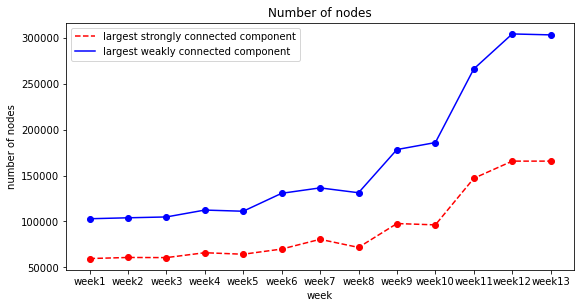

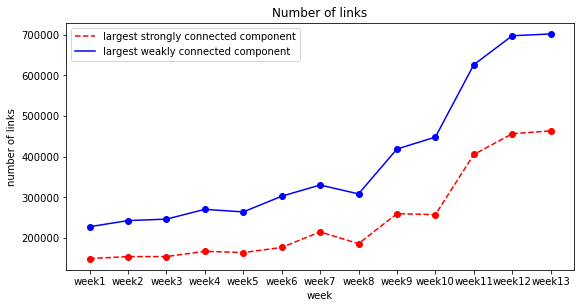

In [134]:
plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
plt.plot(df_strong.index,df_strong['Number of nodes'], color="r",linestyle = "--",label = 'largest strongly connected component')
plt.scatter(df_strong.index,df_strong['Number of nodes'], color="r")
plt.plot(df_weak.index,df_weak['Number of nodes'], color="b",linestyle = "-",label = 'largest weakly connected component')
plt.scatter(df_weak.index,df_weak['Number of nodes'], color="b")
plt.title('Number of nodes')
plt.ylabel('number of nodes')
plt.xlabel('week')
plt.legend()
plt.show()

plt.figure(figsize=(20,10))
plt.subplot(2, 2, 2)
plt.plot(df_strong.index,df_strong['Number of links'], color="r",linestyle = "--",label = 'largest strongly connected component')
plt.scatter(df_strong.index,df_strong['Number of links'], color="r")
plt.plot(df_weak.index,df_weak['Number of links'], color="b",linestyle = "-",label = 'largest weakly connected component')
plt.scatter(df_weak.index,df_weak['Number of links'], color="b")
plt.title('Number of links')
plt.ylabel ('number of links')
plt.xlabel('week')
plt.legend()
plt.show()


#### number of nodes and links
From Sept. 9, 2013 to Dec. 8, 2013, the number of nodes and links in the strongly and weakly connected networks of bitcoin transactions showed an increasing trend, which is what I expect. This is because the appearance of bitcoin price bubble led to an increase in the number of Bitcoin users. From Sept.9, 2013 to Oct.6, 2013, the growth of Bitcoin network users was slow because there was no price bubble. The rise and fall of the number of nodes and links during the price bubble may be related to Bitcoin price. The decline in the number of nodes and links may be due to the decline in bitcoin prices during the price bubble. From Oct.28th to Nov.23rd (8-11 week), due to the appearance of bitcoin price bubble, the price of bitcoin seriously deviated from its intrinsic value, and the price went up wildly. People joined in bitcoin transactions because of speculative psychology to earn more profits. Therefore, during the price bubble, users of bitcoin network surged, and users made profits through day trading, which led to an increase in the number of links in the network. The trend of changes in the number of nodes and connections between the strong connected network and the weak connected network is similar, both of which proliferate during the price bubble, and grew slowly before and after the price bubble.

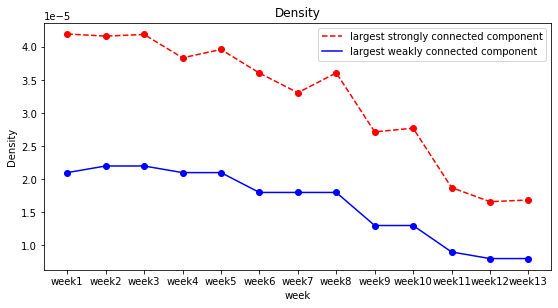

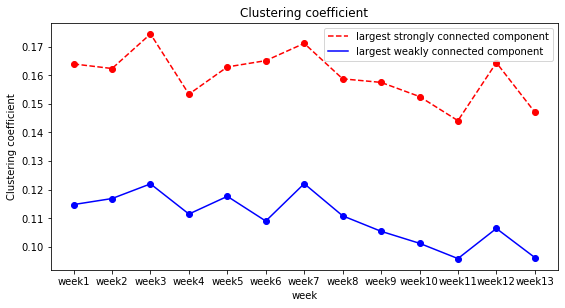

In [135]:
plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
plt.plot(df_strong.index,df_strong['Density'], color="r",linestyle = "--",label = 'largest strongly connected component')
plt.scatter(df_strong.index,df_strong['Density'], color="r")
plt.plot(df_weak.index,df_weak['Density'], color="b",linestyle = "-",label = 'largest weakly connected component')
plt.scatter(df_weak.index,df_weak['Density'], color="b")
plt.title('Density')
plt.ylabel ('Density')
plt.xlabel('week')
plt.legend()
plt.show()

plt.figure(figsize=(20,10))
plt.subplot(2, 2, 2)
plt.plot(df_strong.index,df_strong['Clustering coefficient'], color="r",linestyle = "--",label = 'largest strongly connected component')
plt.scatter(df_strong.index,df_strong['Clustering coefficient'], color="r")
plt.plot(df_weak.index,df_weak['Clustering coefficient'], color="b",linestyle = "-",label = 'largest weakly connected component')
plt.scatter(df_weak.index,df_weak['Clustering coefficient'], color="b")
plt.title('Clustering coefficient')
plt.ylabel ('Clustering coefficient')
plt.xlabel('week')
plt.legend()
plt.show()

#### Density
From Sept. 9, 2013 to Dec. 8, 2013, the density of the strongly and weakly connected networks of bitcoin transactions showed a fluctuating decline. This is not what I expect. During this period, the number of nodes and links in the network increased, and the maximum number of edges in the network increased, so the ratio of the number of links and the maximum number of edges in the network should increase. However, the figure shows that the network density was decreasing. So this is not what I expected. During the bitcoin price bubble, the network density of strongly connected and weakly connected networks showed a downward trend as a whole, although it increased in a few weeks. It may be because the number of new users was growing too fast, the transactions between users were not frequent, and there were a large number of user nodes in the network, which led to the decrease of network density. The density of strongly connected networks changed significantly, while that of weakly connected networks did not change significantly, which may be due to the fact that there were fewer nodes and connections in strongly connected networks, which had a great influence on the density change.

#### Clustering coefficient
From Sep.9, 2013 to Dec. 8, 2013, the clustering coefficients of the strongly connected networks and the weakly connected networks of bitcoin transactions showed fluctuating changes. From the first week to the fourth week, the clustering coefficients of the strongly connected network and the weakly connected network fluctuated, which is not what I expected. I think the clustering coefficient should rise. Because the number of nodes and edges in the network grew slowly in the first four weeks, and the probability of transactions between old users and new users was very small. So the clustering coefficient should be increased. From the fifth week to the seventh week, the clustering coefficient of the strongly connected network increased, while that of the weakly connected network fluctuated. This is not what I expected. From the seventh week to the eleventh week, the clustering coefficients of the strongly connected network and the weakly connected network decreased, which is in line with my expectation. With the emergence of price bubbles, many new user nodes have emerged in Bitcoin network, and transactions between users became frequent. So old users may trade with new users, and the clustering coefficient of the network may decrease. At the beginning of the price bubble, the clustering coefficient of the strongly connected network increased, probably because many new users joined the bitcoin network with the increase of bitcoin price, and they had no experience in bitcoin transaction, so these new users might trade with old users they knew. In the later period of the price bubble (7-11 weeks), the clustering coefficient decreased. It may be because with the change of bitcoin price, a large number of new user nodes enter the network, and old users have a high probability to trade with new users, so the clustering coefficient decreases.
The trend of clustering coefficients of bitcoin transactions in strong connected networks and weak connected networks is roughly the same. However, in strongly connected networks, the clustering coefficient increases from the fifth week to the sixth week, while in weakly connected networks, the clustering coefficient decreases from the fifth week to the sixth week.


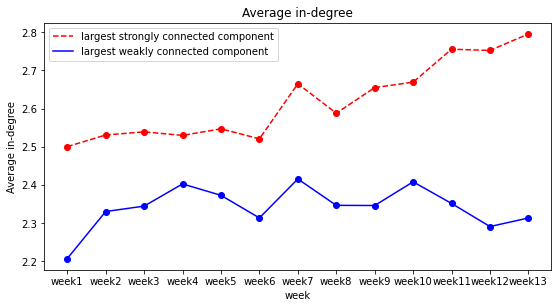

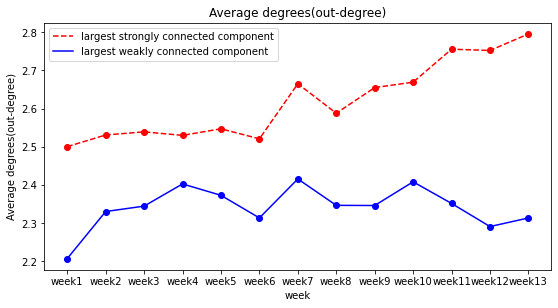

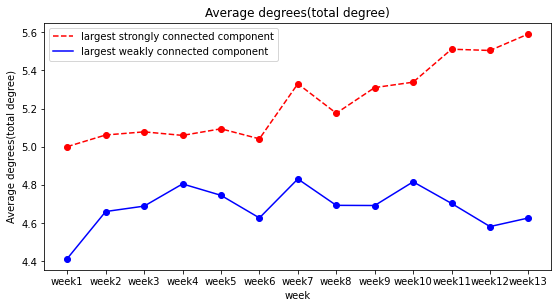

In [136]:
plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
plt.plot(df_strong.index,df_strong['Average degrees(in-degree)'], color="r",linestyle = "--",label = 'largest strongly connected component')
plt.scatter(df_strong.index,df_strong['Average degrees(in-degree)'], color="r")
plt.plot(df_weak.index,df_weak['Average degrees(in-degree)'], color="b",linestyle = "-",label = 'largest weakly connected component')
plt.scatter(df_weak.index,df_weak['Average degrees(in-degree)'], color="b")
plt.title('Average in-degree')
plt.xlabel('week')
plt.ylabel('Average in-degree')
plt.legend()
plt.show()

plt.figure(figsize=(20,10))
plt.subplot(2, 2, 2)
plt.plot(df_strong.index,df_strong['Average degrees(out-degree)'], color="r",linestyle = "--",label = 'largest strongly connected component')
plt.scatter(df_strong.index,df_strong['Average degrees(out-degree)'], color="r")
plt.plot(df_weak.index,df_weak['Average degrees(out-degree)'], color="b",linestyle = "-",label = 'largest weakly connected component')
plt.scatter(df_weak.index,df_weak['Average degrees(out-degree)'], color="b")
plt.title('Average degrees(out-degree)')
plt.ylabel('Average degrees(out-degree)')
plt.xlabel('week')
plt.legend()
plt.show()

plt.figure(figsize=(20,10))
plt.subplot(2, 2, 3)
plt.plot(df_strong.index,df_strong['Average degrees(total degree)'], color="r",linestyle = "--",label = 'largest strongly connected component')
plt.scatter(df_strong.index,df_strong['Average degrees(total degree)'], color="r")
plt.plot(df_weak.index,df_weak['Average degrees(total degree)'], color="b",linestyle = "-",label = 'largest weakly connected component')
plt.scatter(df_weak.index,df_weak['Average degrees(total degree)'], color="b")
plt.title('Average degrees(total degree)')
plt.ylabel('Average degrees(total degree)')
plt.xlabel('week')
plt.legend()
plt.show()

#### Average in_degree, Average out_degree, Average total degree
From Sept. 9, 2013 to Dec. 8, 2013, the average in-degree, out-degree and total degree of the strongly  and weakly connected networks of Bitcoin transactions showed a fluctuating upward trend. The trend of network average in-degree, out-degree and total degree is in line with my expectation. Because of the increase of user nodes and links in the network, the number of transactions between users increased. Each user would transfer out and into Bitcoin. So the average in-degree, out-degree and average total degree in the network increased. During the bitcoin price bubble period, the average in-degree, average out-degree and average total degree of strongly connected networks declined for a short time, but generally increased, indicating that the number of transactions between users increased and users wanted to profit from the transactions. The average in-degree, out-degree and total degree of weakly connected network fluctuated during the price bubble period, sometimes rising and sometimes falling. After the price bubble ended, the average in-degree, out-degree and average total degree of strongly connected networks increased, while the average in-degree, out-degree and average total degree of weakly connected networks decreased.

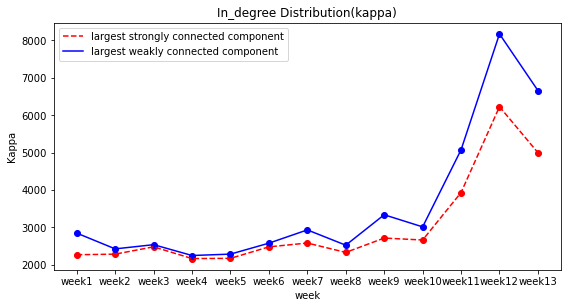

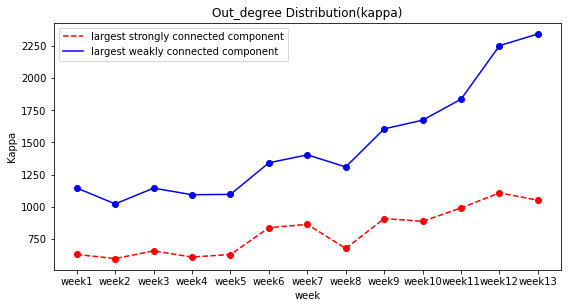

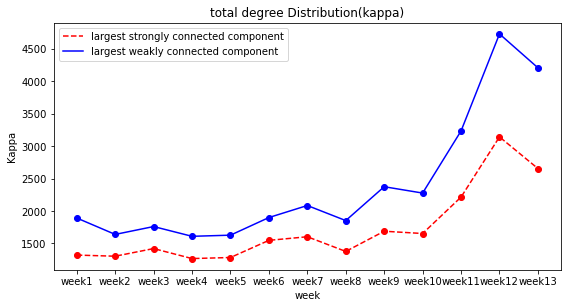

In [137]:
plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
plt.plot(df_strong.index,df_strong['In_degree Distribution(k)'], color="r",linestyle = "--",label = 'largest strongly connected component')
plt.scatter(df_strong.index,df_strong['In_degree Distribution(k)'], color="r")
plt.plot(df_weak.index,df_weak['In_degree Distribution(k)'], color="b",linestyle = "-",label = 'largest weakly connected component')
plt.scatter(df_weak.index,df_weak['In_degree Distribution(k)'], color="b")
plt.title('In_degree Distribution(kappa)')
plt.ylabel('Kappa')
plt.xlabel('week')
plt.legend()
plt.show()

plt.figure(figsize=(20,10))
plt.subplot(2, 2, 2)
plt.plot(df_strong.index,df_strong['Out_degree Distribution(k)'], color="r",linestyle = "--",label = 'largest strongly connected component')
plt.scatter(df_strong.index,df_strong['Out_degree Distribution(k)'], color="r")
plt.plot(df_weak.index,df_weak['Out_degree Distribution(k)'], color="b",linestyle = "-",label = 'largest weakly connected component')
plt.scatter(df_weak.index,df_weak['Out_degree Distribution(k)'], color="b")
plt.title('Out_degree Distribution(kappa)')
plt.ylabel ('Kappa')
plt.xlabel('week')
plt.legend()
plt.show()

plt.figure(figsize=(20,10))
plt.subplot(2, 2, 3)
plt.plot(df_strong.index,df_strong['total degree Distribution(k)'], color="r",linestyle = "--",label = 'largest strongly connected component')
plt.scatter(df_strong.index,df_strong['total degree Distribution(k)'], color="r")
plt.plot(df_weak.index,df_weak['total degree Distribution(k)'], color="b",linestyle = "-",label = 'largest weakly connected component')
plt.scatter(df_weak.index,df_weak['total degree Distribution(k)'], color="b")
plt.title('total degree Distribution(kappa)')
plt.ylabel ('Kappa')
plt.xlabel('week')
plt.legend()
plt.show()

#### In_degree Distribution, Out_degree Distribution, Total degree Distribution
From Sep. 9, 2013 to Dec. 8, 2013, the kappa values of in-degree, out-degree and total degree distribution of both two types of networks showed an overall upward trend. This is what I'm looking forward to. The larger the Kappa value, the higher the heterogeneity of the network. Because of the increase in the number of nodes in the Bitcoin network, there would be many new users with small degrees, and they might only buy bitcoins and sell bitcoins only once. In the early stage of the price bubble (from the fifth week to the seventh week), the value of  parameter kappa slowly increased. This may be because the bitcoin price bubble has just begun to appear. The growth of new users and the number of transactions between users was also slow. From the seventh week to the eighth week, the kappa values of in-degree distribution, out-degree distribution and degree distribution all showed a downward trend, which was the same as the change trend of the number of nodes and links. It may be because bitcoin prices have fallen and transactions between users have decreased as they didn’t want to lose money. From the 9th week to the 10th week, the kappa values of in-degree distribution and total degree distribution decreased, while the kappa values of out-degree increased, which may also be related to the change of bitcoin price. As the price of bitcoin dropped, users reduced buying bitcoins. Some users might choose to transfer out their bitcoins because of the impact of the previous price drop, so that they could bear smaller losses. Therefore, the kappa value of out-degree distribution increased. From the 10th week to the 11th week (late period of price bubble), the kappa value of the in-degree distribution, out-degree distribution and degree distribution increased, which might be due to the crazy rise of bitcoin price. Many users wanted to buy bitcoins to make money, and some users may worry that the price of bitcoin would drop in the future, which would lead to money loss. Therefore, some users chose to transfer out their bitcoin to ensure that they would not lose money. In these three graphs, the overall trend of kappa values of strongly connected networks and weakly connected networks is the same. The change of kappa value of weakly connected networks is more obvious, which may be because weakly connected networks have more user nodes and links.

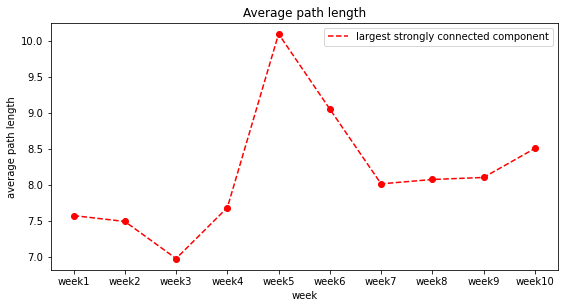

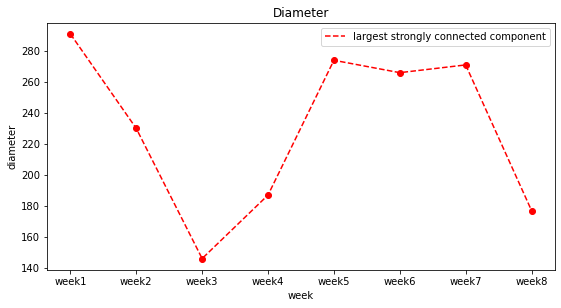

In [39]:
#average path length
plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
plt.plot(df_strong.index,df_strong['Average path length'], color="r",linestyle = "--",label = 'largest strongly connected component')
plt.scatter(df_strong.index,df_strong['Average path length'], color="r")
plt.title('Average path length')
plt.ylabel('average path length')
plt.xlabel('week')
plt.legend()
plt.show()

#diameter
plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
plt.plot(df_strong.index,df_strong['Diameter'], color="r",linestyle = "--",label = 'largest strongly connected component')
plt.scatter(df_strong.index,df_strong['Diameter'], color="r")
plt.title('Diameter')
plt.ylabel('diameter')
plt.xlabel('week')
plt.legend()
plt.show()

#### Average path length
I only calculated the average path length of the strongly connected network for 1-10 weeks. So I only analyzed them. From the first week to the fourth week, the average path length firstly decreased and then increased, with a small fluctuation range. This change is in line with my expectation. The price bubble had not yet occurred, and it was normal for the average path length to fluctuate in a small range because the number of user transactions was changing everyday. From the fourth week to the fifth week, the average path length surged, which was in line with my expectation. Since the fifth week, bitcoin had experienced a price bubble, with more user nodes and frequent transactions. From the fifth week to the seventh week, the average path length decreased, which was not what I expected. Due to the price bubble, the price of bitcoin rose, the number of nodes and links in the network increased, and the transactions became frequent. I think the average path should rise. From the seventh week to the tenth week, the average path length changed slowly, probably because the price of bitcoin dropped during the price bubble, and the transactions between users became less frequent.

#### Diameter
I only calculated the diameters of strongly connected networks from week one to week eight, so I only analyzed them. From the first week to the fourth week, the network diameter first dropped sharply, and then increased. This is what I expected because this was the same trend as the average path length. Bitcoin network might be affected by bitcoin price, and transactions were not frequent. From the fifth week, there was a price bubble, and the network diameter surged. This is what I expected. The network price of Bitcoin seriously exceeded its value, which leads to the emergence of many new user nodes and the frequent transactions in the network. From the fifth week to the seventh week, the diameter changed slowly, and from the seventh week to the eighth week, the diameter of the network decreased, which is what I expect. This is similar to the change of bitcoin network nodes and links. It may be due to the sharp drop of bitcoin price during the price bubble period, the number of transactions in the network decreased and the diameter of network dropped.

### Exercise 2.3 [5 marks]

#### 2.3.1
Use an algorithm of your choice (motivate your choice by discussing the pros and cons) to find the communities in the last weekly network. Draw the corresponding super-networks of communities.

#### 2.3.2
Discuss your findings from 2.3.1, including any limitation of these results.

#### 2.3.1
When dividing the community, I chose Clause-Newman-Moore greedy modularity maximization. This algorithm is a new greedy algorithm, which uses the data structure of the heap to calculate and update the modularity of the network. The complexity of this algorithm is close to linear complexity, and the running speed is fast. There are many nodes in Bitcoin network, so I choose this method to divide the modules and save the running time.

In [89]:
GB13 = nx.read_graphml('/afs/inf.ed.ac.uk/user/s21/s2163972/Downloads/2013-12-02_to_2013-12-08.graphml')
from networkx.algorithms.community import greedy_modularity_communities
result = greedy_modularity_communities(GB13)
result

KeyboardInterrupt: 

In [ ]:
def create_partition_map(partition):
    partition_map = {}
    for idx, cluster_nodes in enumerate(partition):
        for node in cluster_nodes:
            partition_map[node] = idx
    return partition_map

In [ ]:
import matplotlib.pyplot as plt
partition_map = create_partition_map(result)
node_colors = [partition_map[n] for n in G3.nodes()]

In [ ]:
plt.figure(figsize=(100,100))
nx.draw(G3,with_labels=False, node_color=node_colors,width=3,node_size=5000)

### Exercise 2.4 [15 marks]
Find the 5 most important nodes in the network. Discuss and motivate your assumptions. Discuss your results and their implications.

In [24]:
from itertools import islice
total_list = dict(sorted(dict(nx.degree(GB13)).items(),key=lambda x: x[1], reverse=True))
print(list(islice(total_list.keys(),5)))

['24778', '3183164', '4475683', '1056959', '4614011']


I think the five most important nodes in Bitcoin network are the five nodes with the highest degree in the network. The higher the degree of a node, the more nodes it connects, or there are many other nodes connected to it. In Bitcoin network, the higher the degree of a user's node, the more direct transactions he has with other users, or other users can also conduct indirect transactions with other users through the user with the highest degree of nodes. For example, other users can give Bitcoin to the user with the highest node degree first, and then the user with the highest node can transfer bitcoins to other users again. Most bitcoin transactions only have an outgoing transaction and an incoming transaction. That is the user node only has an outgoing transaction and an incoming transaction. So there are many nodes with small degrees in the bitcoin network, and the heterogeneity of the network is high. However, nodes with high degree are likely to be illegal trading nodes of bitcoin, that is, bitcoins flow into illegal trading nodes and then flow out to the next transaction. The illegal transaction node only acts as a transit transaction node, bearing the function of circulation transaction. Therefore, the node with the highest degrees is likely to be an illegal transaction node. So I think the 5 most important nodes in the network are the 5 highest degree nodes.

### Exercise 2.5 [5 marks]
Suppose you are working for DogeInvest Ltd, an investment fund specialising in cryptocurrencies. You convinced them to hire you because you persuaded them that network science is amazing, and they can make billions by following your advice. 

Now, your managers asked you to write a short report (max 3 paragraphs) on the results of your bitcoin network analysis, and asked you not to use technical terms because they do not understand network science. 

Before the bitcoin price bubble appeared, the transaction volume of bitcoin network was small and the price was relatively stable. When there was a price bubble in Bitcoin, the price of Bitcoin was on the rise. Because of speculative psychology, people wanted to gain benefits through bitcoin transanctions, so a large number of new users joined bitcoin transactions in order to gain short-term profits through bid-ask spread and make speculative profits. Due to the increase of users, bitcoin transactions became increasingly active.

The rapid increase of bitcoin market price was accompanied by a large free fluctuation of price. During the bitcoin price bubble, there were many price drops. Due to the drop in price, the number of users of bitcoin transactions decreased, and the transactions became inactive. However, after the price of bitcoin continued to increase, transactions began to become active, and a large number of new users joined the bitcoin trading network. However, after the second price drop, some users choose to trade bitcoin in order to reduce losses, and they are worried that the price of bitcoin may fall again.

In addition, in bitcoin transactions, the number of most users' transactions was very small. Many users only bought and sold bitcoin once, and there were very few users with a large number of bitcoin transactions. Users with large number of bitcoin transactions may be trading platforms. A large number of users had low transaction times. This would make the price of bitcoin may be manipulated by some trading platforms (dealers), which had an impact on the price increase of bitcoin.


## PART 3 - Network Comparison

### Exercise 3.1 [10 marks]

Compare the Bitcoin Networks and the Game of Networks networks in light of your previous results. Include as much detail as necessary to support your analysis and discussion.

#### The game network
The number of nodes and links in the game network is relatively small, and the network density is relatively high, which indicates that the nodes in the game network are closely connected with each other. The clustering coefficient is small, which means that students in the neighborhood of student nodes are not familiar with each other in the game network. The average in-degree, out-degree, average path length and network diameter of the game are relatively lower than those of the Bitcoin network. This may be due to the small number of nodes in the network, so the number of links is also relatively small. The kappa values of in-degree distribution, out-degree distribution and total degree distribution heterogeneous are close to 1, indicating that there are many nodes in the network whose degrees are distributed around a certain value.

#### Bitcoin network:
The number of nodes and links of Bitcoin network far exceeds that of game network, and the average path length and network diameter are larger than those of game network. However, the network density is small, and the average in-degree, average out-degree, and average degree of bitcoin network are not much different from those of game network. Moreover, the kappa parameters of in-degree distribution, out-degree distribution and total degree distribution are very large, far greater than 1. This shows that although the number of nodes and links in Bitcoin network is relatively large, the number of nodes with high degree is relatively small, and the number of nodes with low degree is relatively large. So Bitcoin network is a sparse network. Compared with game network, the clustering coefficient of Bitcoin network is a little larger, which indicates that Bitcoin transactions will also occur between neighboring user nodes of user nodes in the network.
